# Minería de datos-Actividad 1

### Estudiante: DIANA CRISTINA ROJAS ROMANÍ
### Docente: Jose Armando Murillo


## 1. Importación de librerías

In [858]:
#Importe de librerías necesarias a usar

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from matplotlib import rcParams
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from tabulate import tabulate
import warnings
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA


In [859]:
from datetime import datetime, timedelta


In [860]:
from sklearn.impute import KNNImputer
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE



In [861]:
from sklearn.preprocessing import StandardScaler


In [862]:
import missingno as msn

In [863]:
import seaborn as sns


In [864]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score

In [865]:
from sklearn.metrics import silhouette_score, classification_report, confusion_matrix , precision_score,  recall_score, auc,roc_curve,accuracy_score,f1_score
from sklearn.preprocessing import MinMaxScaler, KBinsDiscretizer
from sklearn.cluster import KMeans, DBSCAN, AffinityPropagation, MeanShift, estimate_bandwidth, SpectralClustering, AgglomerativeClustering, OPTICS, cluster_optics_dbscan, Birch, MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [866]:
import multiprocessing

In [867]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2. Carga de datasets y conversión a dataframe

In [868]:
!ls "/content/drive/My Drive/DATA SCIENCE/VIU/MINERIA DE DATOS/"


 85f3c468-c9f9-489d-a30d-92f50b282e77_1_240606T230803287Z.mp4
 8713bebf-7ecb-4830-88c6-4856b9bd6056_1_240604T222228158Z.mp4
 Credit_card.csv
 Credit_card_label.csv
 FORO-DIANA-CRISTINA-ROJAS-ROMANI.gdoc
'minería act2.gdoc'
'Tema1 Introducción al proceso KDD.pdf'
'Tema 2 Representación gráfica de variables (1).pdf'
'Tema 3  Análisis y transformación de variables.pdf'
'Tema 4 Técnicas de agrupamiento.pdf'
'Tema 5 Modelos predictivos.pdf'


In [869]:
# Importación de los archivos csv
dataframe_kaggle_data = pd.read_csv('/content/drive/My Drive/DATA SCIENCE/VIU/MINERIA DE DATOS/Credit_card.csv')
dataframe_kaggle_label = pd.read_csv('/content/drive/My Drive/DATA SCIENCE/VIU/MINERIA DE DATOS/Credit_card_label.csv')


In [870]:
# Unimos ambos archivos en uno solo para tener la data completa para su posterior predicción
dataframe_kaggle = pd.merge(dataframe_kaggle_data, dataframe_kaggle_label, on='Ind_ID')

###### Acontinuación listo la definición de cada columna del dataframe:

Ind_ID: Client ID

Gender: Gender information

Car_owner: Having car or not

Propert_owner: Having property or not

Children: Count of children

Annual_income: Annual income

Type_Income: Income type

Education: Education level

Marital_status: Marital_status

Housing_type: Living style

Birthday_count: Use backward count from current day (0), -1 means yesterday.

Employed_days: Start date of employment. Use backward count from current day (0). Positive value means, individual is currently unemployed.

Mobile_phone: Any mobile phone

Work_phone: Any work phone

Phone: Any phone number

EMAIL_ID: Any email ID

Type_Occupation: Occupation

Family_Members: Family size

Another data set (Credit_card_label.csv) contains two key pieces of information

ID: The joining key between application data and credit status data, same is Ind_ID

Label: 0 is application approved and 1 is application rejected.

<p style="color: #1e90ff; font-size: 16px;">ENCARGO 1: Indicar el tamaño del conjunto de datos </p>

In [871]:
# Visualización de las columnas del dataframe
columnas = dataframe_kaggle.columns
print(columnas)

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members',
       'label'],
      dtype='object')


In [872]:
# Visualización de las 5 primeras filas del dataframe
dataframe_kaggle.head()

Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0  5008827      M         Y             Y         0       180000.0   
1  5009744      F         Y             N         0       315000.0   
2  5009746      F         Y             N         0       315000.0   
3  5009749      F         Y             N         0            NaN   
4  5009752      F         Y             N         0       315000.0   

            Type_Income         EDUCATION Marital_status       Housing_type  \
0             Pensioner  Higher education        Married  House / apartment   
1  Commercial associate  Higher education        Married  House / apartment   
2  Commercial associate  Higher education        Married  House / apartment   
3  Commercial associate  Higher education        Married  House / apartment   
4  Commercial associate  Higher education        Married  House / apartment   

   Birthday_count  Employed_days  Mobile_phone  Work_Phone  Phone  EMAIL_ID  \
0        -18772.0         365243             1           0      0         0   
1        -13557.0           -586             1           1      1         0   
2             NaN           -586             1           1      1         0   
3        -13557.0           -586             1           1      1         0   
4        -13557.0           -586             1           1      1         0   

  Type_Occupation  Family_Members  label  
0             NaN               2      1  
1             NaN               2      1  
2             NaN               2      1  
3             NaN               2      1  
4             NaN               2      1

In [873]:
# Visualización de las 5 últimas filas del dataframe
dataframe_kaggle.tail()

Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
1543  5028645      F         N             Y         0            NaN   
1544  5023655      F         N             N         0       225000.0   
1545  5115992      M         Y             Y         2       180000.0   
1546  5118219      M         Y             N         0       270000.0   
1547  5053790      F         Y             Y         0       225000.0   

               Type_Income                      EDUCATION  \
1543  Commercial associate               Higher education   
1544  Commercial associate              Incomplete higher   
1545               Working               Higher education   
1546               Working  Secondary / secondary special   
1547               Working               Higher education   

            Marital_status       Housing_type  Birthday_count  Employed_days  \
1543               Married  House / apartment        -11957.0          -2182   
1544  Single / not married  House / apartment        -10229.0          -1209   
1545               Married  House / apartment        -13174.0          -2477   
1546        Civil marriage  House / apartment        -15292.0           -645   
1547               Married  House / apartment        -16601.0          -2859   

      Mobile_phone  Work_Phone  Phone  EMAIL_ID Type_Occupation  \
1543             1           0      0         0        Managers   
1544             1           0      0         0     Accountants   
1545             1           0      0         0        Managers   
1546             1           1      1         0         Drivers   
1547             1           0      0         0             NaN   

      Family_Members  label  
1543               2      0  
1544               1      0  
1545               4      0  
1546               2      0  
1547               2      0

## 3. Tamaño del conjunto de datos


In [874]:
# Cálculo del total de filas y total de columnas con el uso del atributo "shape"
tamanno_data = dataframe_kaggle.shape
print(tamanno_data)

# Cálculo del total todos los valores del dataframe con el atributo "size"
total_data = dataframe_kaggle.size
print(total_data)

(1548, 19)
29412


<p style="color: #1e90ff; font-size: 16px;">ENCARGO 3: Verificar los tipos de variable de cada columna</p>

In [875]:
# Detección de tipos de datos
dataframe_kaggle.dtypes



Ind_ID               int64
GENDER              object
Car_Owner           object
Propert_Owner       object
CHILDREN             int64
Annual_income      float64
Type_Income         object
EDUCATION           object
Marital_status      object
Housing_type        object
Birthday_count     float64
Employed_days        int64
Mobile_phone         int64
Work_Phone           int64
Phone                int64
EMAIL_ID             int64
Type_Occupation     object
Family_Members       int64
label                int64
dtype: object

In [876]:
# Inspección general del dataframe
dataframe_kaggle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

##### En total hay 18 columnas de los cuales 10 columnas son variables numéricas y 8 son variables categóricas.

In [877]:
dataframe_kaggle.describe()

Ind_ID     CHILDREN  Annual_income  Birthday_count  \
count  1.548000e+03  1548.000000   1.525000e+03     1526.000000   
mean   5.078920e+06     0.412791   1.913993e+05   -16040.342071   
std    4.171759e+04     0.776691   1.132530e+05     4229.503202   
min    5.008827e+06     0.000000   3.375000e+04   -24946.000000   
25%    5.045070e+06     0.000000   1.215000e+05   -19553.000000   
50%    5.078842e+06     0.000000   1.665000e+05   -15661.500000   
75%    5.115673e+06     1.000000   2.250000e+05   -12417.000000   
max    5.150412e+06    14.000000   1.575000e+06    -7705.000000   

       Employed_days  Mobile_phone   Work_Phone        Phone     EMAIL_ID  \
count    1548.000000        1548.0  1548.000000  1548.000000  1548.000000   
mean    59364.689922           1.0     0.208010     0.309432     0.092377   
std    137808.062701           0.0     0.406015     0.462409     0.289651   
min    -14887.000000           1.0     0.000000     0.000000     0.000000   
25%     -3174.500000           1.0     0.000000     0.000000     0.000000   
50%     -1565.000000           1.0     0.000000     0.000000     0.000000   
75%      -431.750000           1.0     0.000000     1.000000     0.000000   
max    365243.000000           1.0     1.000000     1.000000     1.000000   

       Family_Members        label  
count     1548.000000  1548.000000  
mean         2.161499     0.113049  
std          0.947772     0.316755  
min          1.000000     0.000000  
25%          2.000000     0.000000  
50%          2.000000     0.000000  
75%          3.000000     0.000000  
max         15.000000     1.000000

##### Se observa que hay variables de tipo string pero podrían convertirse a numéricas ya que solo tiene dos valores (y:yes y n:no); así también podemos analizar otras variables que más adelantes aliminaremos o crearemos nuevas variables dependiendo de su funcionalidad para responder a la pregunta de qué clientes calificarían a una tarjeta de crédito.

In [878]:
# Duplicación del dataframe para empezar con los siguientes pasos de limpieza y preprocesamiento; con esto se evitará perder el dataframe original.
dfcredito = dataframe_kaggle
# Este paso es importante ya que desde el siguiente apartado se empezará con las modificaciones en el dataframe.

## 4.Limpieza de datos

### Determinación de valores faltantes o null

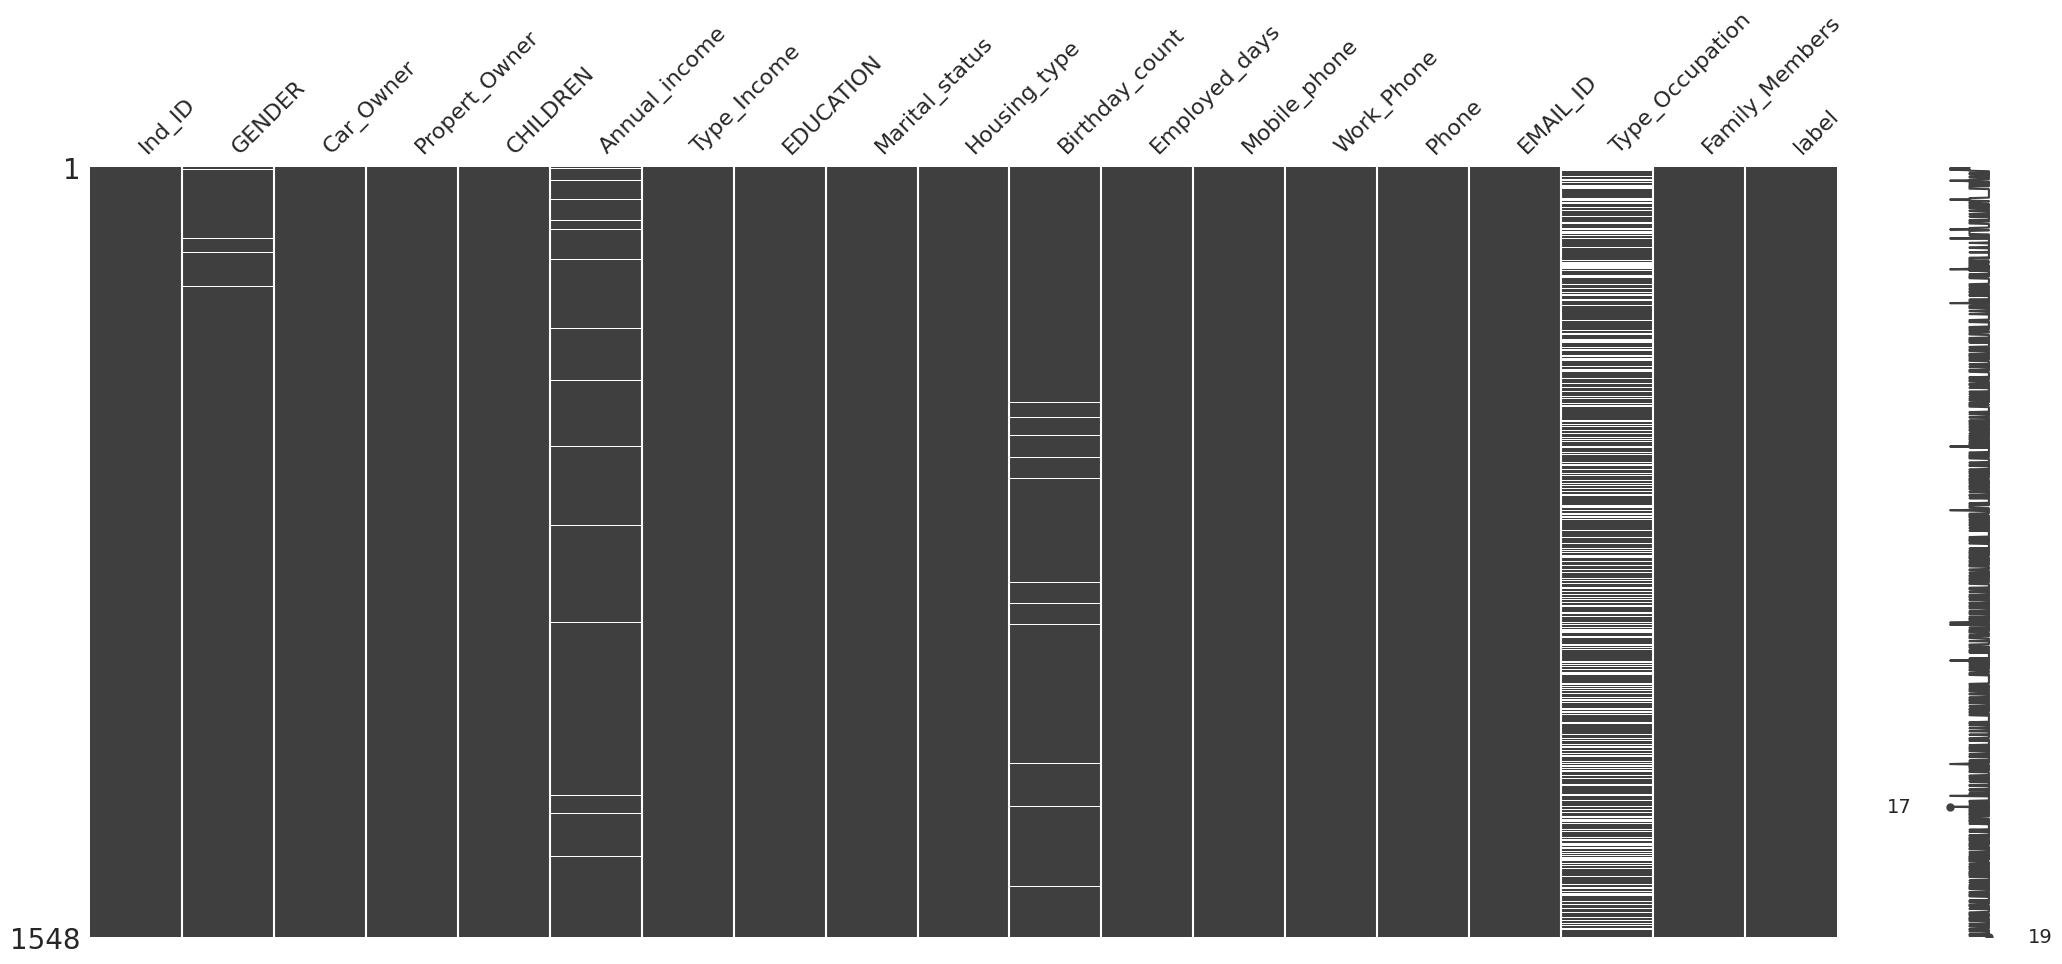

In [879]:
msn.matrix(dfcredito);

##### Del gráfico observado conocemos que la columna "Type_occupation" tiene muchos valores faltantes mientras que la columna "GENDER" tiene unos pocos seguidos por "Anual_income" y "Birthday_count".

<p style="color: #1e90ff; font-size: 16px;">ENCARGO 5: Determinar si hay valores faltantes en al menos un atributo categórico o numérico</p>

In [880]:
# Vemos la cantidad de datos faltantes
dfcredito.isnull().sum()
# Se observa que hay 4 columnas las cuales tienen cierta cantidad de null en sus filas; estas son GENDER, Annual_income, Birthday_count y Type_Ocupation

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

##### En este punto decidimos cómo tratar esos valores faltantes. Para ello analizamos cada columna por separado y para ello podemos ayudarnos de la teoría hallada.
##### Referencias: Tratamiento de valores vacíos I con R y Python: Cómo abordar datos incompletos en tu dataset.
##### https://nicolasurrego.medium.com/tratamiento-de-valores-faltantes-i-c%C3%B3mo-abordar-datos-incompletos-en-tu-dataset-35d51c522842
##### Identificación e imputación de valores perdidos en Python
##### https://elmundodelosdatos.com/identificacion-valores-perdidos-python/#google_vignette

In [881]:
# Podemos ver el porcentaje de valores nulos por columna en caso se requiera eliminar o mantener dicha columna.
porcentaje_missingvalues = (dfcredito.isnull().sum() / len(dfcredito)) * 100
print(porcentaje_missingvalues)


Ind_ID              0.000000
GENDER              0.452196
Car_Owner           0.000000
Propert_Owner       0.000000
CHILDREN            0.000000
Annual_income       1.485788
Type_Income         0.000000
EDUCATION           0.000000
Marital_status      0.000000
Housing_type        0.000000
Birthday_count      1.421189
Employed_days       0.000000
Mobile_phone        0.000000
Work_Phone          0.000000
Phone               0.000000
EMAIL_ID            0.000000
Type_Occupation    31.524548
Family_Members      0.000000
label               0.000000
dtype: float64


##### Observamos que la columna "Type_Occupation" tiene un alto porcentaje de missing values comnparado con las otras 3 columnas. Apesar de ello,considero que no es una razón suficiente para eliminarla ya que el tipo de ocupación es necesaria saber para considerar si un cliente podría pagar con constancia su línea de crédito.

In [882]:
# Veamos los valores únicos de la columna
dfcredito["Type_Occupation"].unique()

array([nan, 'Core staff', 'Cooking staff', 'Laborers', 'Sales staff',
       'Accountants', 'High skill tech staff', 'Managers',
       'Cleaning staff', 'Drivers', 'Low-skill Laborers', 'IT staff',
       'Waiters/barmen staff', 'Security staff', 'Medicine staff',
       'Private service staff', 'HR staff', 'Secretaries',
       'Realty agents'], dtype=object)

##### Vemos que tiene diferentes ocupaciones a los cuales podemos considerar a un cliente como calificado para la tarjeta de crédito. Debido a que no podemos atribuir una ocupación al azar a más del 31% de clientes porque crearía un sesgo en los resultados del análisis; realizaremos una inputación de datos calculando la moda ya que se trata de una variable categórica.


<p style="color: #1e90ff; font-size: 16px;">ENCARGO 10: Tratar los valores faltantes </p>

##### Para ello agregamos los valores faltantes a las columnas empezando por la columna "Type_Occupation". Esto mediante el cálculo de la moda por ser una variable categórica.

In [883]:

# Imputamos valores de la columna Type_Occupation con la moda
dfcredito['Type_Occupation'].fillna(dfcredito['Type_Occupation'].mode()[0], inplace=True)
print("Valores faltantes en Type_Occupation: " +   str(dfcredito['Type_Occupation'].isnull().sum()))
# En el resultado del print se observa que la columna Type_Occupation ya no cuenta con valores faltantes por lo que continuamos con las demás columnas.

Valores faltantes en Type_Occupation: 0


##### Ahora, tratamos los valores nulos de "Annual_income" y "Birthday_count". Por ser ambas columnas con variables  de tipo float, rellenaremos los espacios en blanco con la mediana de los demás datos.

In [884]:
# Imputamos la variable Annual_income con la media
dfcredito['Annual_income'].fillna(dfcredito['Annual_income'].mean(), inplace=True)
print("valores perdidos en Annual_income: " +  str(dfcredito['Annual_income'].isnull().sum()))

# Imputamos la variable Birthday_count con la media
dfcredito['Birthday_count'].fillna(dfcredito['Birthday_count'].mean(), inplace=True)
print("valores perdidos en Birthday_count: " +  str(dfcredito['Birthday_count'].isnull().sum()))

# En ambos resultados de los prints observamos que ya no se tienen datos faltantes.

valores perdidos en Annual_income: 0
valores perdidos en Birthday_count: 0


##### Ahora, tratamos los valores nulos de la columna "GENDER"

In [885]:
# Para esta columna considero que si atribuyoel género a los clientes con esa data faltante no representaría un sesgo futuro en el análisis del modelo.
# Rellenamos los datos faltantes en la columna GENDER con la mitad que sean de género femenino y la otra mitad de género masculino.
indices_nulls = dfcredito[dfcredito['GENDER'].isnull()].index  # Índices de las filas con valores faltantes
# División de los índices en dos grupos
midpoint = len(indices_nulls) // 2
first_half_indices = indices_nulls[:midpoint]
second_half_indices = indices_nulls[midpoint:]

dfcredito.loc[first_half_indices, 'GENDER'] = 'F' # LLenamos la primera mitad con GENDER = F
dfcredito.loc[second_half_indices, 'GENDER'] = 'M' # LLenamos la otra mitad con GENDER = M


In [886]:
dfcredito.isnull().sum()  # Verificamos si todas las columnas ya no tienen valores faltantes


Ind_ID             0
GENDER             0
Car_Owner          0
Propert_Owner      0
CHILDREN           0
Annual_income      0
Type_Income        0
EDUCATION          0
Marital_status     0
Housing_type       0
Birthday_count     0
Employed_days      0
Mobile_phone       0
Work_Phone         0
Phone              0
EMAIL_ID           0
Type_Occupation    0
Family_Members     0
label              0
dtype: int64

##### El resultado de la búsqueda de valores nulos en todo el dataframe es nulo por lo que ya inputamos datos y el df esta completo.

## 5. Preprocesamiento

<p style="color: #1e90ff; font-size: 16px;">ENCARGO 14:  Normalizar y/o discretizar variables
</p>

In [887]:

# Para ello eliminamos espacios en blanco y convertimos a minúsculas
dfcredito = dfcredito.applymap(lambda x: x.strip().lower() if isinstance(x, str) else x)

In [888]:


# Según lo observado en la información del dataframe, hay variables categóricas que tienen valores de tipo numérico y viceversa;
#  por lo que en este paso vamos a correjir ello.
dfcredito['Ind_ID'] = dfcredito['Ind_ID'].astype(object) # ID del cliente es un valor único para cada ciente por lo que debe ser de tipo string
dfcredito["Mobile_phone"] = dfcredito["Mobile_phone"].astype(object) # Mobile_phone del cliente es un valor no contable/categórico por lo que debe ser de tipo string
dfcredito["Work_Phone"] = dfcredito["Work_Phone"].astype(object) # Mobile_phone del cliente es un valor no contable/categórico por lo que debe ser de tipo string
dfcredito["EMAIL_ID"] = dfcredito["EMAIL_ID"].astype(object)    # Mobile_phone del cliente es un valor no contable/categórico por lo que debe ser de tipo string
dfcredito["Phone"] = dfcredito["Phone"].astype(object) # Mobile_phone del cliente es un valor no contable/categórico por lo que debe ser de tipo string

dfcredito.info()  # En el resultado observamos que ya hemos cambiado las variables a su tipo correcto

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   object 
 1   GENDER           1548 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1548 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1548 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   object 
 13  Work_Phone       1548 non-null   object 
 14  Phone            1548 non-null   object 
 15  EMAIL_ID         1548 non-null   object 
 16  Type_Occupation  1548 non-null   object 
 17  Family_Members

In [889]:
#Además también podeos verificar si los valores tienen el formato correcto; por ejemplo la columa Annual_income es de tipo float
# Redondear los valores a números enteros
dfcredito['Annual_income'] = dfcredito['Annual_income'].astype(float).round()

# Convertir de nuevo a tipo int
dfcredito['Annual_income'] = dfcredito['Annual_income'].astype(int)

<p style="color: #1e90ff; font-size: 16px;">ENCARGO 2:  Verificación y/o eliminación de duplicados</p>


In [890]:
duplicates = dfcredito.duplicated()
duplicate_rows = dfcredito.loc[duplicates]
print(duplicate_rows)

Empty DataFrame
Columns: [Ind_ID, GENDER, Car_Owner, Propert_Owner, CHILDREN, Annual_income, Type_Income, EDUCATION, Marital_status, Housing_type, Birthday_count, Employed_days, Mobile_phone, Work_Phone, Phone, EMAIL_ID, Type_Occupation, Family_Members, label]
Index: []


##### Luego de aplicar el duplicated al dataframe observamos que resulta un dataframa vacio(empty) por lo que no hay necesidad de eliminar duplicados en este df; en caso hubiese habido se usaría el siguiente comando: dfcredit_nuevo = dfcredit.drop_duplicates()

<p style="color: #1e90ff; font-size: 16px;">ENCARGO 13:  Generar variables nuevas
</p>

##### Una de las columnas a crear es la de edad ya que se cuenta con fecha de nacimiento pero no con la edad. Esta variable es necesaria para conocer el estado de la person ya que mientras sean más jóvenes hay más posibilidades  de pago y tiempo de crédito; todo ello también dependerá de otros factores pero sí considero que es importante para un mejor análisis.

In [891]:
# Fecha actual
today = datetime.now()

# Convertir 'Birthday_count' a fecha de nacimiento
dfcredito['fecha_born'] = dfcredito['Birthday_count'].apply(lambda x: today + timedelta(days=x))

# Calcular la edad a partir de la fecha de nacimiento
dfcredito['Edad'] = dfcredito['fecha_born'].apply(lambda x: today.year - x.year - ((today.month, today.day) < (x.month, x.day)))
dfcredito["Edad"]

0       51
1       37
2       43
3       37
4       37
        ..
1543    32
1544    28
1545    36
1546    41
1547    45
Name: Edad, Length: 1548, dtype: int64

In [892]:
print(dfcredito["Edad"].unique() )
print(dfcredito["Edad"].min() )
print(dfcredito["Edad"].max() )

# Observamos que las edades comprenden valores desde 21 años hasta los 68 años por lo que podríamos generar una columna con rango de edades entre eesos valores (min y max).

[51 37 43 60 49 24 46 35 32 48 33 42 59 30 54 29 55 57 65 52 44 63 50 31
 26 28 45 67 25 64 41 38 39 34 47 62 53 58 27 56 66 40 36 23 22 61 68 21]
21
68


##### En el siguiente cógido creamos una nueva columna llamada "Rango_Housing_type" previo análisis de la columna Housing_type


In [893]:
print(dfcredito["Housing_type"].unique() )


['house / apartment' 'with parents' 'rented apartment'
 'municipal apartment' 'co-op apartment' 'office apartment']


##### Observamos que tiene dos tipos de datos "house" y "apartment" de los cuales el segundo se divide en varios tipos de departamento sea con padres, rentado, municipal, codepartamento y oficina departamento.
##### De lo observado podemos evaluar solo dos tipos, house y departamento ya que al ser un departamento, en este caso, indica que no es un lugar propio sino compartido o alquilado.

In [894]:
# Definimos una función para clasificar las categorías
def classify_housing(Housing_type):
    if 'house' in Housing_type:
        return 1  # Clasificado como 'house'
    elif 'apartment' in Housing_type:
        return 0  # Clasificado como 'departamento'
    else:
        return 0  # Otras categorías derivadas de especificaciones propias del departamento

# Aplicamos la función a la columna 'Housing_type' y creamos una nueva columna 'Rango_Housing_type'
dfcredito['Rango_Housing_type'] = dfcredito['Housing_type'].apply(classify_housing)

# Cambianos  enteros los valores la nueva columna 'Rango_Housing_type'
dfcredito["Rango_Housing_type"] = dfcredito["Rango_Housing_type"].astype(int)
# Mostramos los valores de los datos de la nueva columna 'Rango_Housing_type'
dfcredito['Rango_Housing_type'].unique()



array([1, 0])

##### En el siguiente cógido creamos una nueva columna llamada "Rango_edad"




In [895]:
# Definimos los rangos de la columna nueva
bins = [21, 30, 40, 50, 68]
# Colocamos las etiquetas para cada rango
labels = [0, 1, 2, 3]
# Aplicamos dichos rangos para nombrarlos de acuerdo a la edad.
dfcredito['Rango_edad'] = pd.cut(dfcredito['Edad'], bins=bins, labels=labels, right=True, include_lowest=True)

# Cambianos  enteros los valores la nueva columna 'Rango_Housing_type'
dfcredito["Rango_edad"] = dfcredito["Rango_edad"].astype(int)

dfcredito.head()


Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0  5008827      m         y             y         0         180000   
1  5009744      f         y             n         0         315000   
2  5009746      f         y             n         0         315000   
3  5009749      f         y             n         0         191399   
4  5009752      f         y             n         0         315000   

            Type_Income         EDUCATION Marital_status       Housing_type  \
0             pensioner  higher education        married  house / apartment   
1  commercial associate  higher education        married  house / apartment   
2  commercial associate  higher education        married  house / apartment   
3  commercial associate  higher education        married  house / apartment   
4  commercial associate  higher education        married  house / apartment   

   ...  Work_Phone  Phone EMAIL_ID Type_Occupation Family_Members label  \
0  ...           0      0        0        laborers              2     1   
1  ...           1      1        0        laborers              2     1   
2  ...           1      1        0        laborers              2     1   
3  ...           1      1        0        laborers              2     1   
4  ...           1      1        0        laborers              2     1   

                  fecha_born  Edad  Rango_Housing_type Rango_edad  
0 1973-02-16 04:32:30.503805    51                   1          3  
1 1987-05-29 04:32:30.503805    37                   1          1  
2 1980-08-09 20:19:55.588995    43                   1          2  
3 1987-05-29 04:32:30.503805    37                   1          1  
4 1987-05-29 04:32:30.503805    37                   1          1  

[5 rows x 23 columns]

##### Continuando con la generación de nuevas variables, vamos a convertir a numéricos las variables categóricas de Car_Owner y Propert_Owner; de valores "y" y "n" a reemplazarce por 1 y 0, respectivamente.


In [896]:
dfcredito['Car_Owner'] = dfcredito['Car_Owner'].replace({'y': 1, 'n': 0})
dfcredito['Propert_Owner'] = dfcredito['Propert_Owner'].replace({'y': 1, 'n': 0})


<p style="color: #1e90ff; font-size: 16px;">ENCARGO 4: Determinar si hay valores fuera de rango en al menos un atributo numérico
 </p>


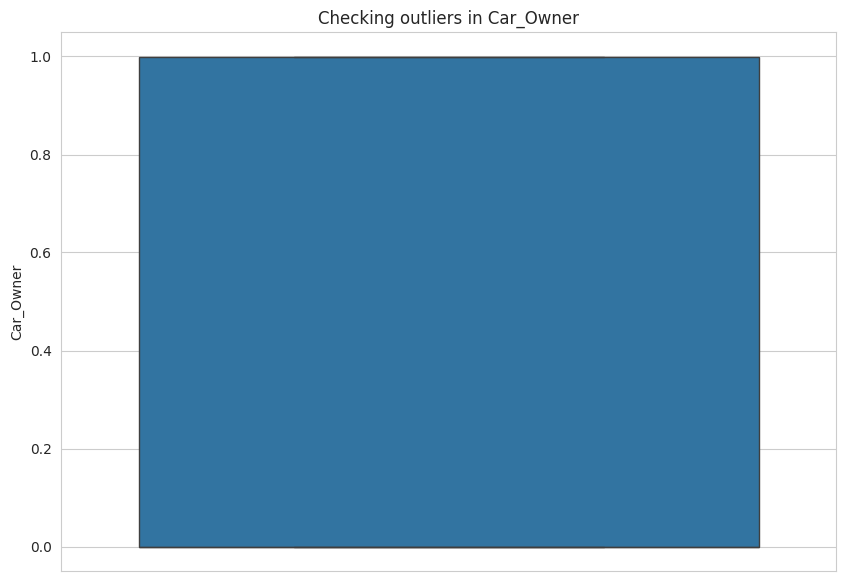

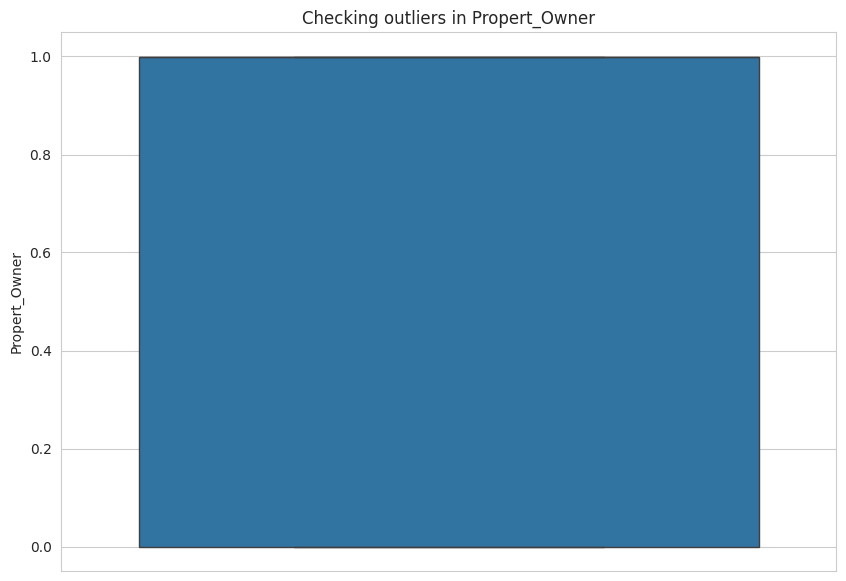

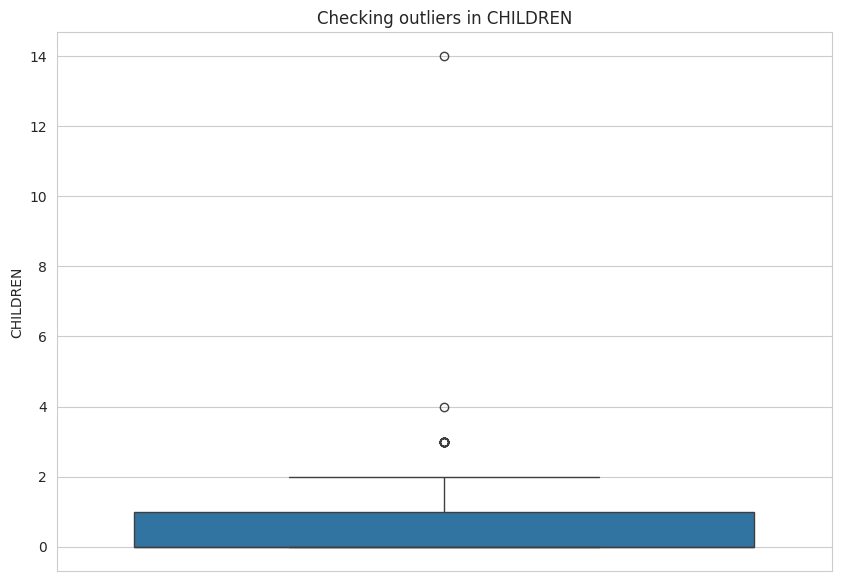

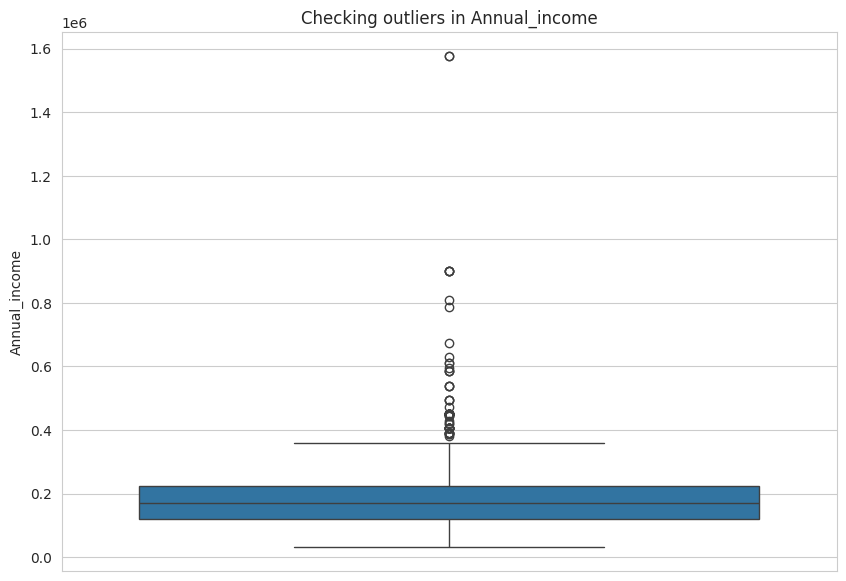

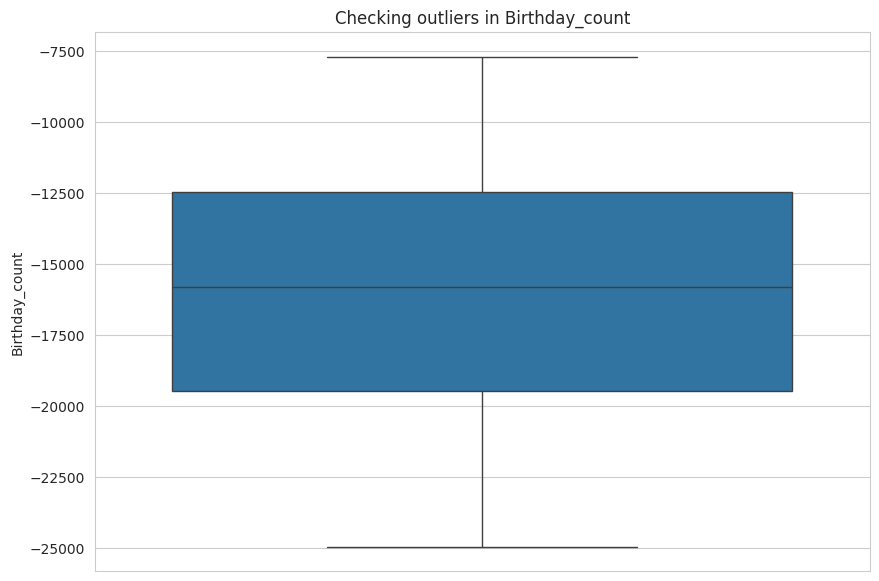

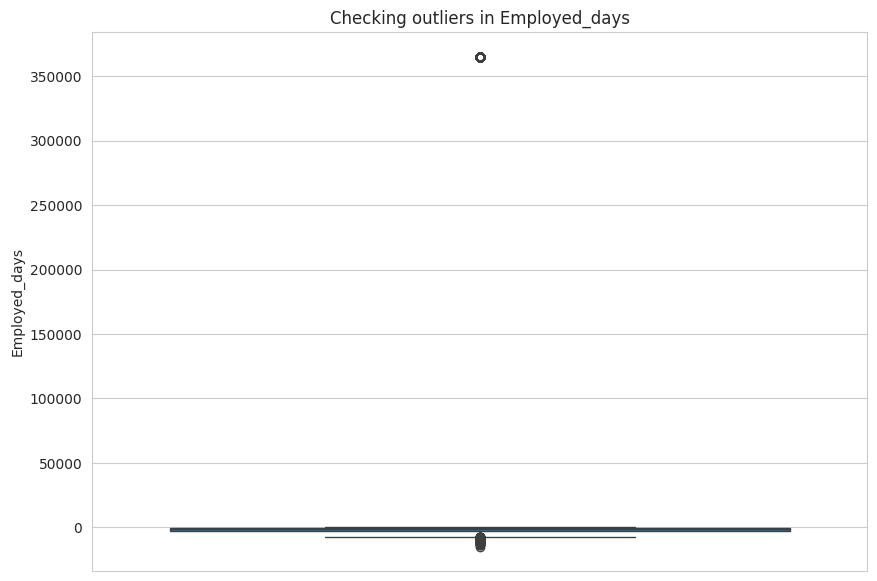

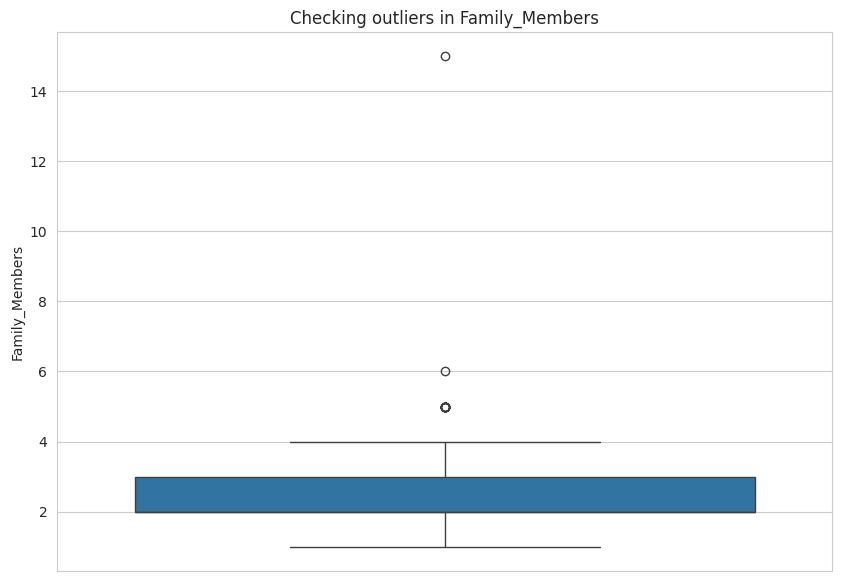

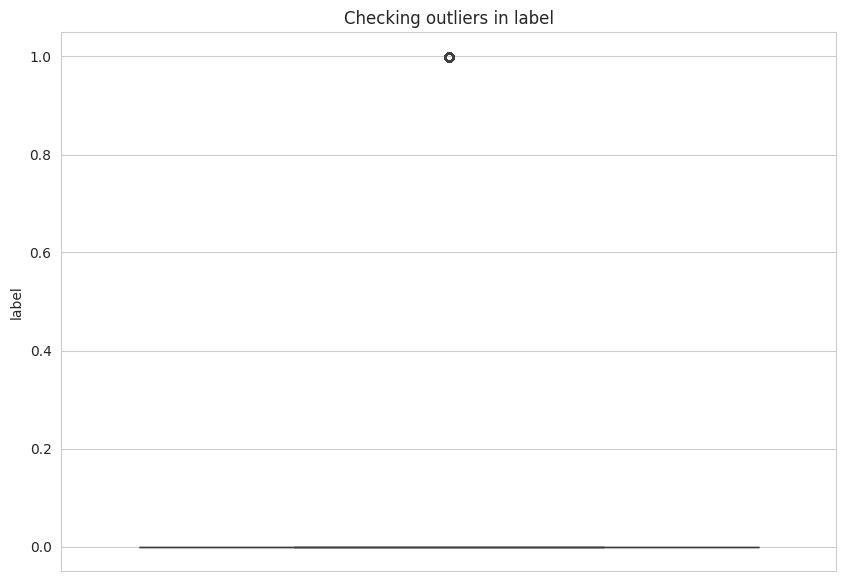

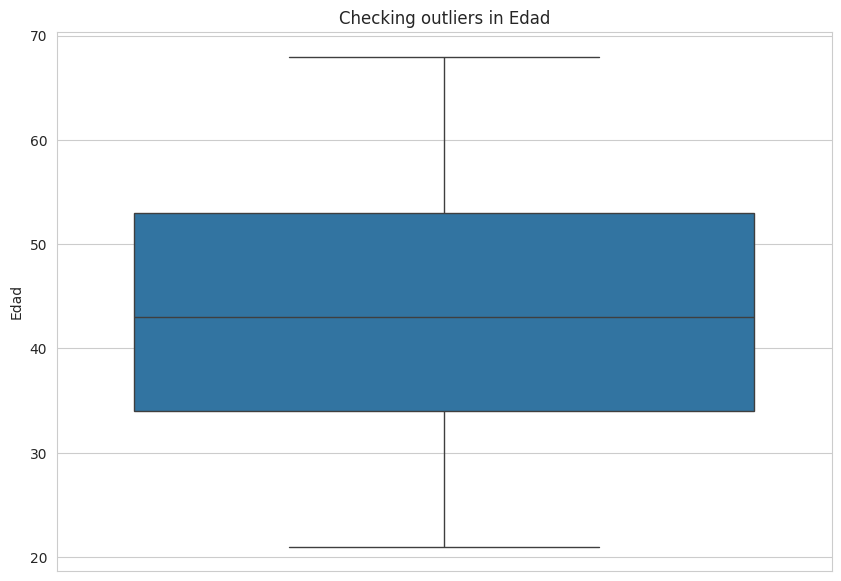

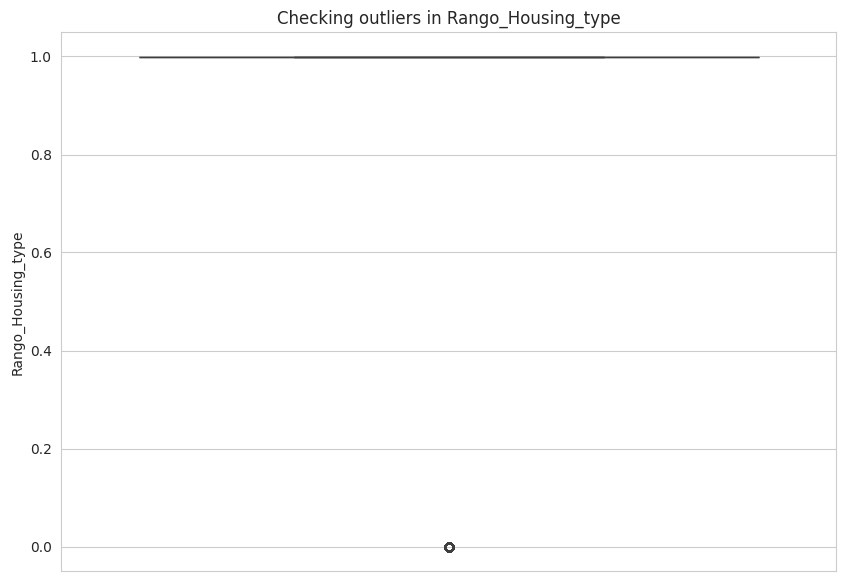

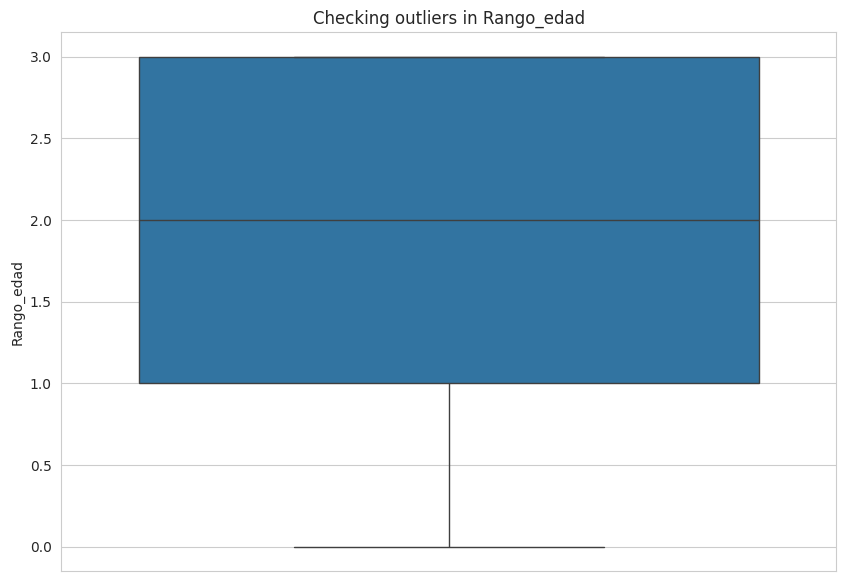

Outliers detectados: {'Car_Owner': [], 'Propert_Owner': [], 'CHILDREN': [121, 290, 447, 468, 479, 565, 646, 757, 784, 872, 1026, 1042, 1230, 1238, 1442, 1507, 1519, 1528], 'Annual_income': [8, 9, 10, 14, 25, 29, 39, 68, 69, 70, 95, 150, 151, 153, 154, 169, 170, 171, 188, 204, 211, 233, 242, 274, 278, 340, 355, 378, 385, 388, 393, 412, 515, 554, 557, 568, 573, 587, 622, 653, 684, 686, 769, 777, 811, 884, 885, 908, 912, 962, 1024, 1053, 1055, 1068, 1076, 1111, 1121, 1175, 1190, 1208, 1287, 1325, 1333, 1350, 1355, 1397, 1407, 1430, 1457, 1467, 1479, 1495, 1538], 'Birthday_count': [], 'Employed_days': [0, 7, 26, 27, 31, 37, 40, 41, 42, 43, 62, 63, 64, 65, 66, 67, 71, 72, 73, 99, 104, 106, 110, 111, 121, 122, 123, 124, 125, 126, 128, 129, 130, 131, 132, 133, 134, 137, 143, 161, 162, 178, 182, 184, 186, 193, 194, 195, 198, 200, 209, 218, 220, 223, 245, 247, 252, 253, 256, 258, 266, 271, 275, 278, 279, 282, 307, 308, 309, 311, 316, 327, 328, 329, 332, 334, 335, 336, 339, 343, 345, 346, 347, 3

In [897]:
# Para detectar los valores fuera de rango creamos una función para verificar y detectarlos
def checking_outliers(dataframe):
    outlier_indices = {}
    for col in dataframe.columns:
        if dataframe[col].dtype in [np.int64, np.int32, np.float64]:
            plt.figure(figsize=(10, 7))
            plt.title(f'Checking outliers in {col}')
            sns.boxplot(dataframe[col])
            plt.show()

            # Detectamos los outliers numéricamente con el rango intercuartil (IQR)
            Q1 = dataframe[col].quantile(0.25)
            Q3 = dataframe[col].quantile(0.75)
            IQR = Q3 - Q1
            # Ahora definimos el lower y el upper para los outliers
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            outliers = dataframe[(dataframe[col] < lower_bound) | (dataframe[col] > upper_bound)]
            outlier_indices[col] = outliers.index.tolist()

    return outlier_indices

# Ahora llamamos a la función con el dataframe de esta actividad: dfcredito
outliers = checking_outliers(dfcredito)
print("Outliers detectados:", outliers)

<p style="color: #1e90ff; font-size: 16px;">ENCARGO 11: Tratar los valores fuera de rango
 </p>

##### Análisis de columnas a eliminar:
##### CHILDREN: en esta columna el valor máximo es 14 según el gráfico de cajas; debido a que es un dato atípico pero probable que una persona tenga 14 hijos ya que podrías ser propios o adoptados.Por ello, dejamos tal cual esta columna, no eliminamos sus valores atípicos. Fuente: https://www.telemundo.com/entretenimiento/latinx-now-style/famosos/conoce-la-filosofia-de-nadya-octomom-suleman-madre-de-14-hijos-rcna91730, https://cnnespanol.cnn.com/2020/11/09/luego-de-tener-14-hijos-hombres-esta-familia-finalmente-da-la-bienvenida-a-una-nina/




##### Birthay_day, Edad: ambas columnas no tien valores atípicos que afectan a la media, la mediana y otros percentiles. Por eso, dejamos tal cual estas columnas.


In [898]:
dfcredito['Employed_days'].max()


365243

In [899]:
dfcredito['Family_Members'].max()


15

##### Employed_days, Family_Members: ambas columnas tienen valores atípicos, sin embargo, son datos altamente posibles por lo que podemos mantener estos valores en cada una de dichas columnas.

In [900]:
dfcredito['Annual_income'].min()

33750

In [901]:
# Es posible que una persona tenga 1575000 dólares como ingreso anual pero según el gráfico de cajas este es un valor muy alejado de la media. Además también hay otros valores altos que siguen después los cualles deberían ser evaluados mediante otro proceso ya que estas personas contarían y
# podrían calificar a otros beneficios de crédito previa evaluación.


In [902]:
# Reemplazo de outliers de la columna Annual_income, definimos la función remove_outliers
def replace_outliers(dataframe, col='list'):
    for c in col:
        Q1 = dataframe[c].quantile(0.25)
        Q3 = dataframe[c].quantile(0.75)
        IQR = Q3 - Q1

        #lower_limit = Q1 - (1.5*IQR) Evitamos usar un límite inferior ya que todo cliente puede ser evaluao a fin de abarcar una base más amplia de futuros acreedores de la tarjeta de crédito.
        upper_limit = Q3 + (1.5*IQR)

        #dataframe.loc[dataframe[c] < lower_limit, c] = lower_limit Evitamos usar un límite inferior,además porque la evaluación comprenderá de otros indicadores como tipo de ingreso, marital_satus y otros
        # Estos otros indicadores pueden ser relevantes e incluso compensar el ingreso bajo de un cliente x.
        dataframe.loc[dataframe[c] > upper_limit, c] = upper_limit

    return dataframe

df = replace_outliers(dfcredito, ['Annual_income'])

In [903]:
# Verificamos que se haya reemplazado los valores de la columna Annual_income y que estos estén dentro del lower y upper limit.
dfcredito['Annual_income'].max()  # Resulta 380250 dólares que es un valor que se encuentra dentro de los límites.

380250

In [904]:
dfcredito.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Ind_ID              1548 non-null   object        
 1   GENDER              1548 non-null   object        
 2   Car_Owner           1548 non-null   int64         
 3   Propert_Owner       1548 non-null   int64         
 4   CHILDREN            1548 non-null   int64         
 5   Annual_income       1548 non-null   int64         
 6   Type_Income         1548 non-null   object        
 7   EDUCATION           1548 non-null   object        
 8   Marital_status      1548 non-null   object        
 9   Housing_type        1548 non-null   object        
 10  Birthday_count      1548 non-null   float64       
 11  Employed_days       1548 non-null   int64         
 12  Mobile_phone        1548 non-null   object        
 13  Work_Phone          1548 non-null   object      

## 5. Selección, preprocesamiento y transformación

<p style="color: #1e90ff; font-size: 16px;">ENCARGO 6:  Cálculo de estadísticas de una variable numérica y de otra categórica
 </p>


##### Estadísticas de Annual_income (variable numérica)


In [905]:
#  Usamos describe para obtener las principales medidas de todos los valores de esa columna
dfcredito['Annual_income'].describe()

count      1548.000000
mean     184537.402455
std       82237.507253
min       33750.000000
25%      121500.000000
50%      171000.000000
75%      225000.000000
max      380250.000000
Name: Annual_income, dtype: float64

##### Estadísticas de   (variable categórica)

In [906]:
# Frecuencia de clases de EDUCATION
pd.value_counts(dfcredito['EDUCATION'])

EDUCATION
secondary / secondary special    1031
higher education                  426
incomplete higher                  68
lower secondary                    21
academic degree                     2
Name: count, dtype: int64

In [907]:
# Frecuencia relativa de EDUCATION
100 * dfcredito['EDUCATION'].value_counts() / len(dfcredito['EDUCATION'])

EDUCATION
secondary / secondary special    66.602067
higher education                 27.519380
incomplete higher                 4.392765
lower secondary                   1.356589
academic degree                   0.129199
Name: count, dtype: float64

In [908]:
# Moda: categoría que más se repite en la columna EDUCATION
dfcredito['EDUCATION'].mode()

0    secondary / secondary special
Name: EDUCATION, dtype: object

## Análisis univariante

### Diagrama de barras de variables categóricas:


<p style="color: #1e90ff; font-size: 16px;">ENCARGO 7: Realizar el diagrama de barras de al menos una variable categórica
 </p>

<Axes: xlabel='Type_Occupation', ylabel='Count'>

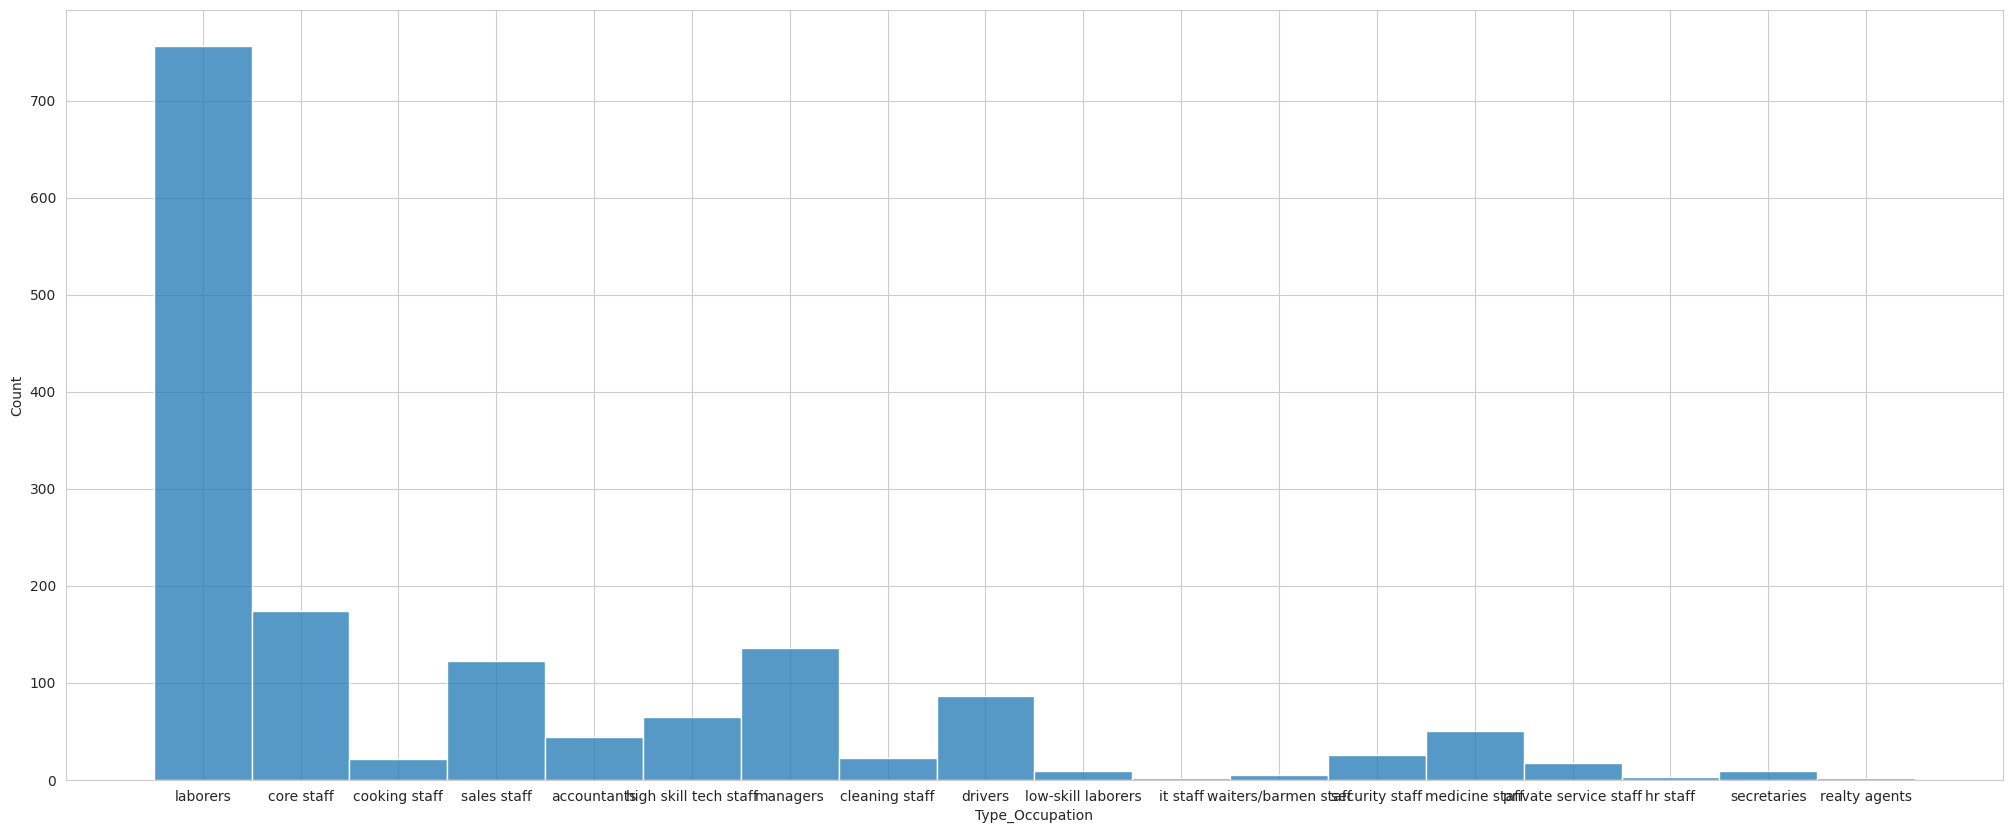

In [909]:
# Análisis univariante de la columna Type_Occupation
plt.figure(figsize=(25, 10))
sns.histplot(data=dfcredito, x='Type_Occupation')

##### Tiene una alta concentración de valores al principio, pero luego se comporta como una distribución normal.

<Axes: xlabel='EDUCATION', ylabel='Count'>

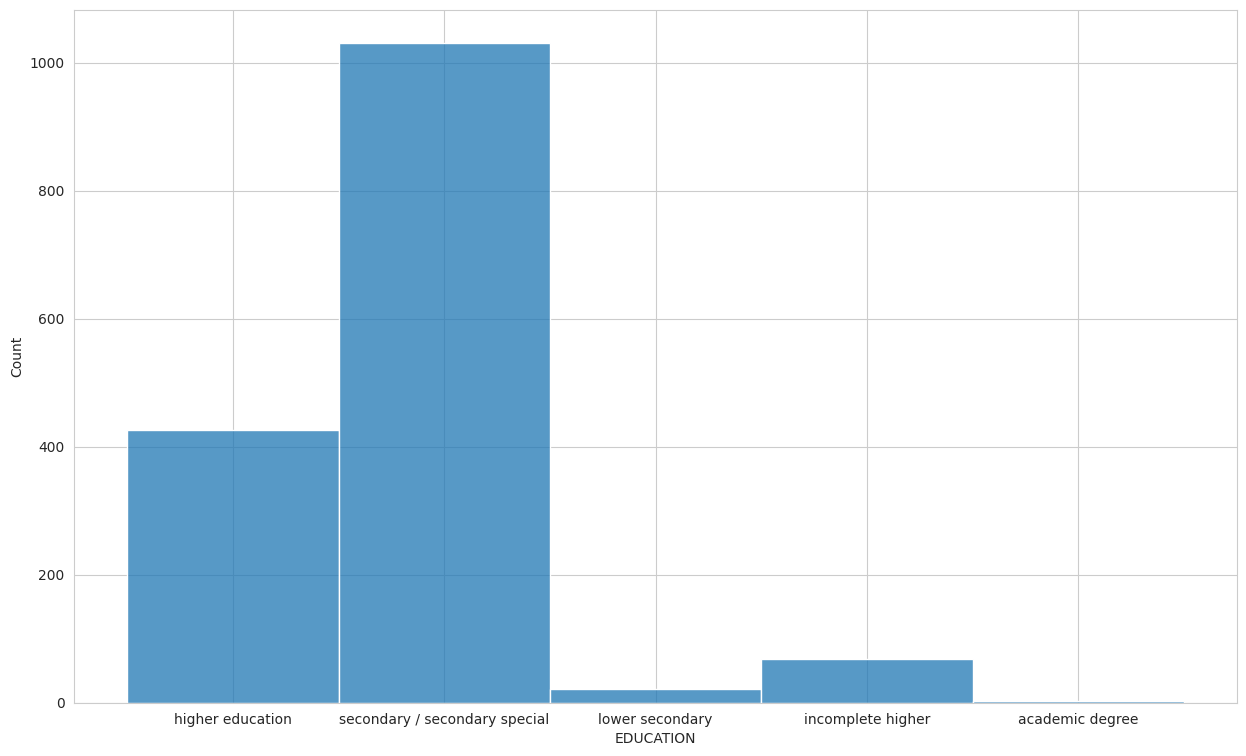

In [910]:
# Análisis univariante de la columna EDUCATION
plt.figure(figsize=(15, 9))
sns.histplot(data=dfcredito, x='EDUCATION')

##### Tiene una alta concentración de valores al principio, pero luego se comporta como una distribución normal.

<Axes: xlabel='Marital_status', ylabel='Count'>

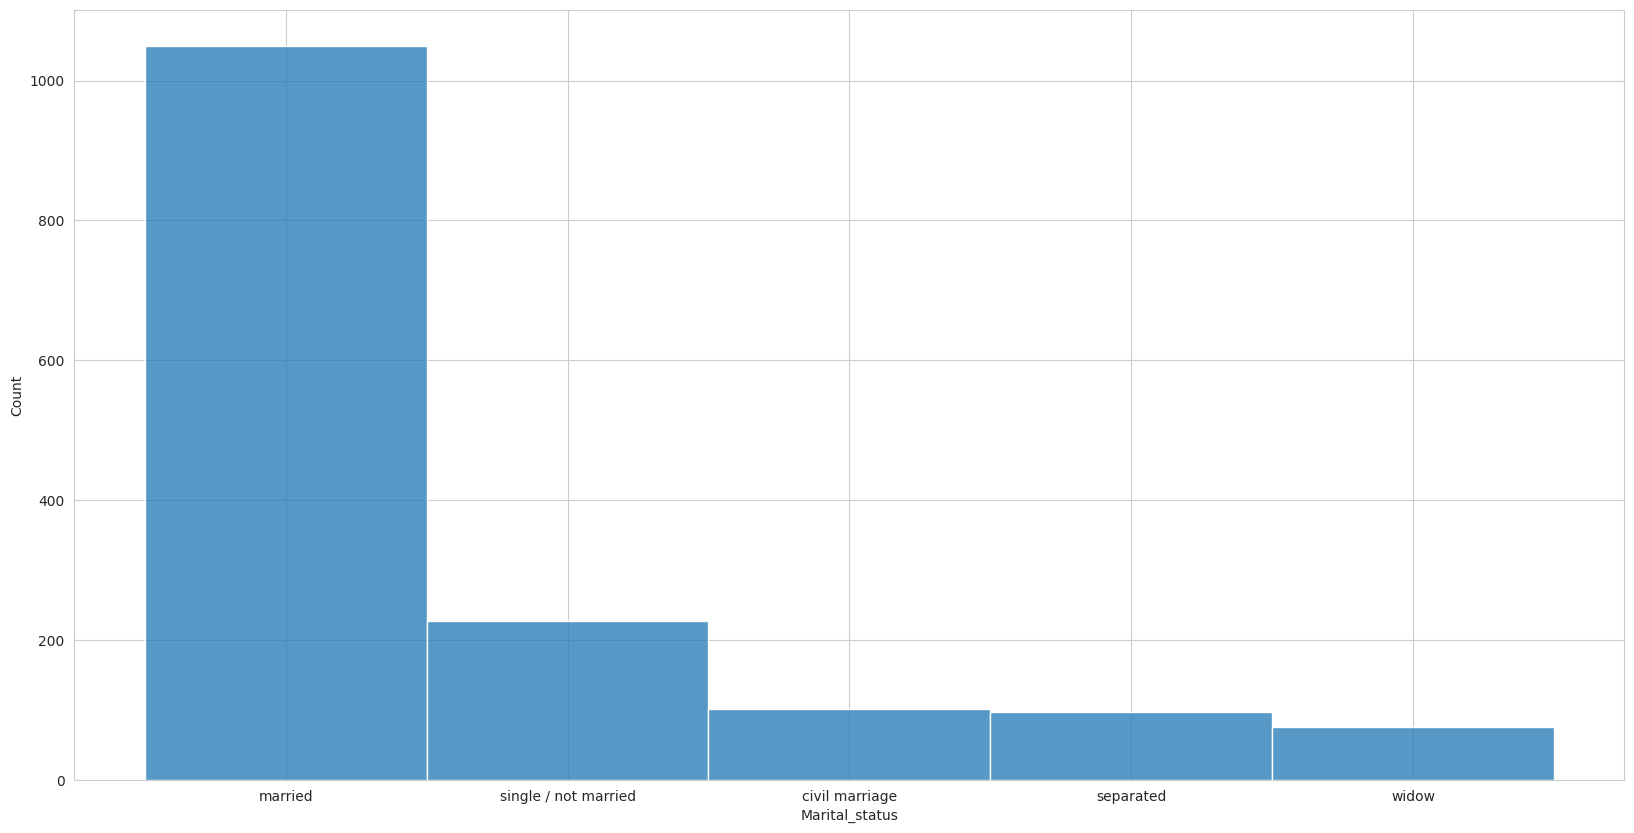

In [911]:
# Análisis univariante de la columna Marital_status
plt.figure(figsize=(20, 10))
sns.histplot(data=dfcredito, x='Marital_status')

<Axes: xlabel='Housing_type', ylabel='Count'>

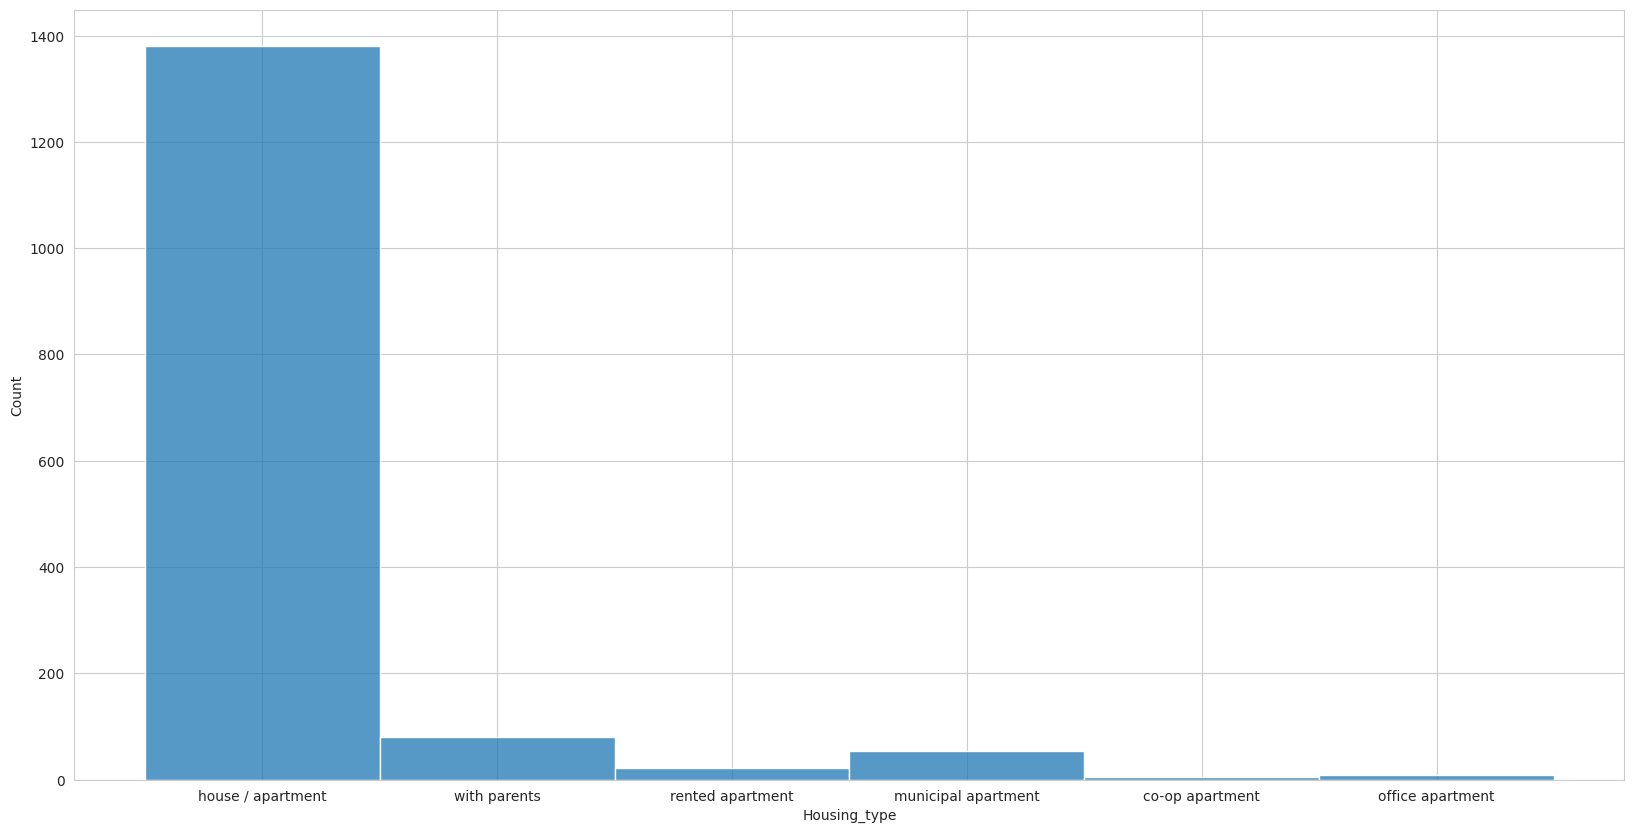

In [912]:
# Análisis univariante de la columna Housing_type
plt.figure(figsize=(20, 10))
sns.histplot(data=dfcredito, x='Housing_type')

##### Tiene una alta concentración de valores al principio, pero luego se comporta como una distribución normal.

<Axes: xlabel='Rango_edad', ylabel='Count'>

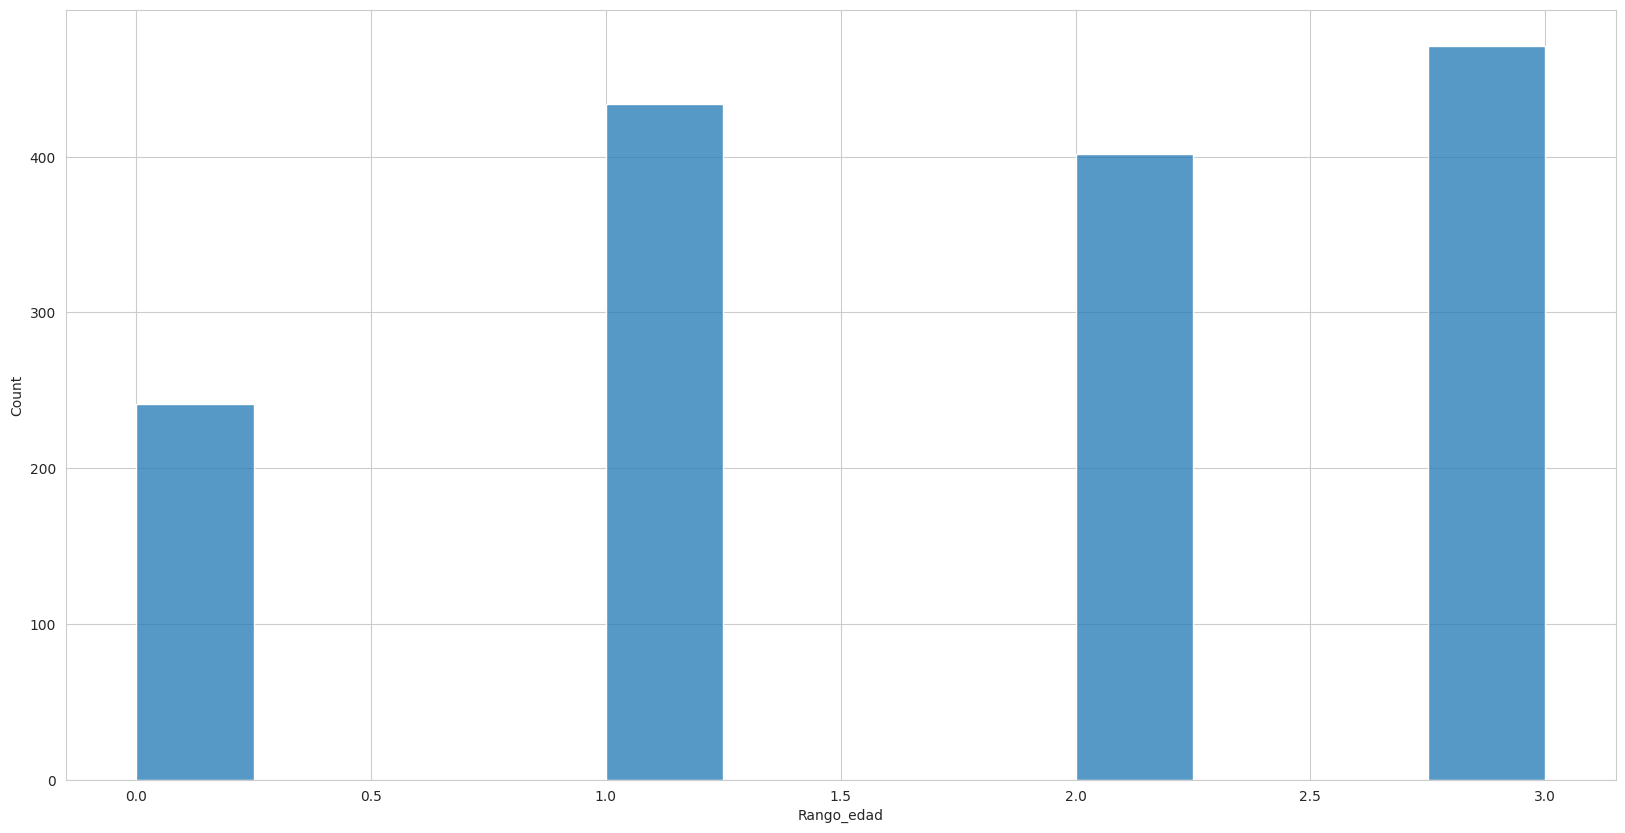

In [913]:
# Análisis univariante de la columna Rango_edad
plt.figure(figsize=(20, 10))
sns.histplot(data=dfcredito, x='Rango_edad')

##### Tiene una alta concentración de valores al principio, pero luego se comporta como una distribución casi normal.

<p style="color: #1e90ff; font-size: 16px;">ENCARGO 8: Realizar el histograma de al menos una variable numérica
 </p>


<Axes: xlabel='Annual_income', ylabel='Count'>

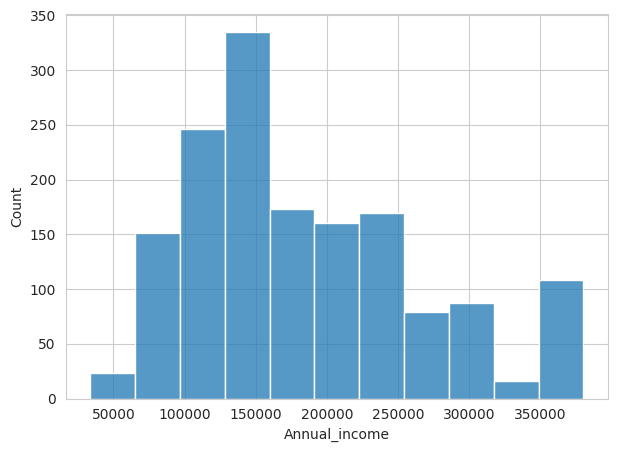

In [914]:
# Análisis univariante de la columna Annual_income
plt.figure(figsize=(7, 5))
sns.histplot(data=dfcredito, x='Annual_income', bins=11)

##### La distribución de esta variable no es exactamente normal. De hecho tiene forma de campana con una cola pesada y que los valores se encuentran en 35

<Axes: xlabel='Family_Members', ylabel='Count'>

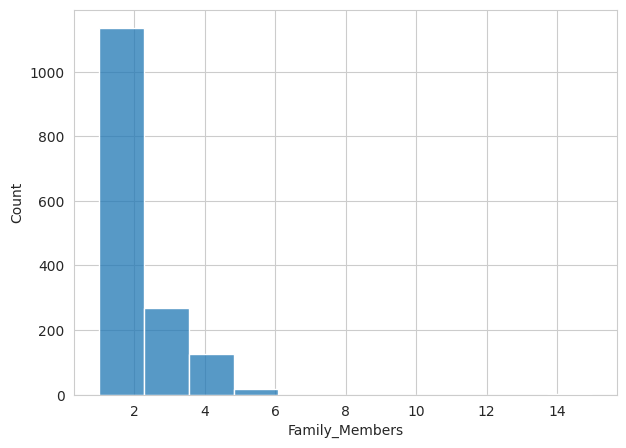

In [915]:
# Análisis univariante de la columna Family_Members
plt.figure(figsize=(7, 5))
sns.histplot(data=dfcredito, x='Family_Members', bins=11)

##  Análisis bivariante

##### Se realizará con 3 columnas de tipo numéricas:  CHILDREN, Annual_income y Type_Income

In [916]:
# Creamos un dataframe con las columnas deseadas
df_analisis = dfcredito[['Annual_income','CHILDREN', 'Family_Members']]

In [917]:
df_analisis.iloc[:,:]

Annual_income  CHILDREN  Family_Members
0            180000         0               2
1            315000         0               2
2            315000         0               2
3            191399         0               2
4            315000         0               2
...             ...       ...             ...
1543         191399         0               2
1544         225000         0               1
1545         180000         2               4
1546         270000         0               2
1547         225000         0               2

[1548 rows x 3 columns]

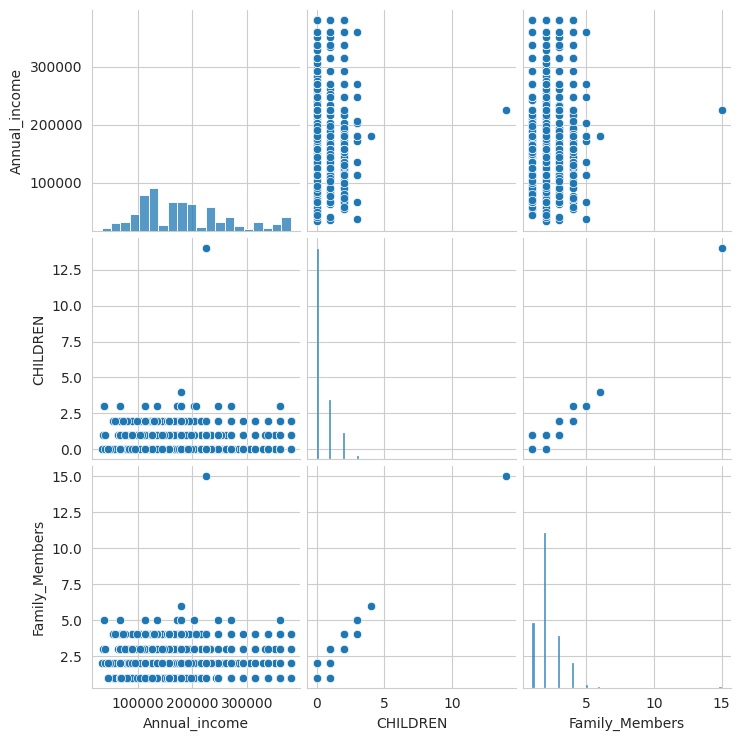

In [918]:
sns.pairplot(df_analisis.iloc[:,:])

##### De las gráficas de dispersión y barras se observa que las variables Annual_income y CHILDREN están altamente relacionadas (puntos más juntos).
##### Además, Family_Members y CHILDREN están disociadas, no presentan relación astrecha entre ambas (puntos dispersos).

## Análisis multivariante

<Figure size 700x700 with 0 Axes>

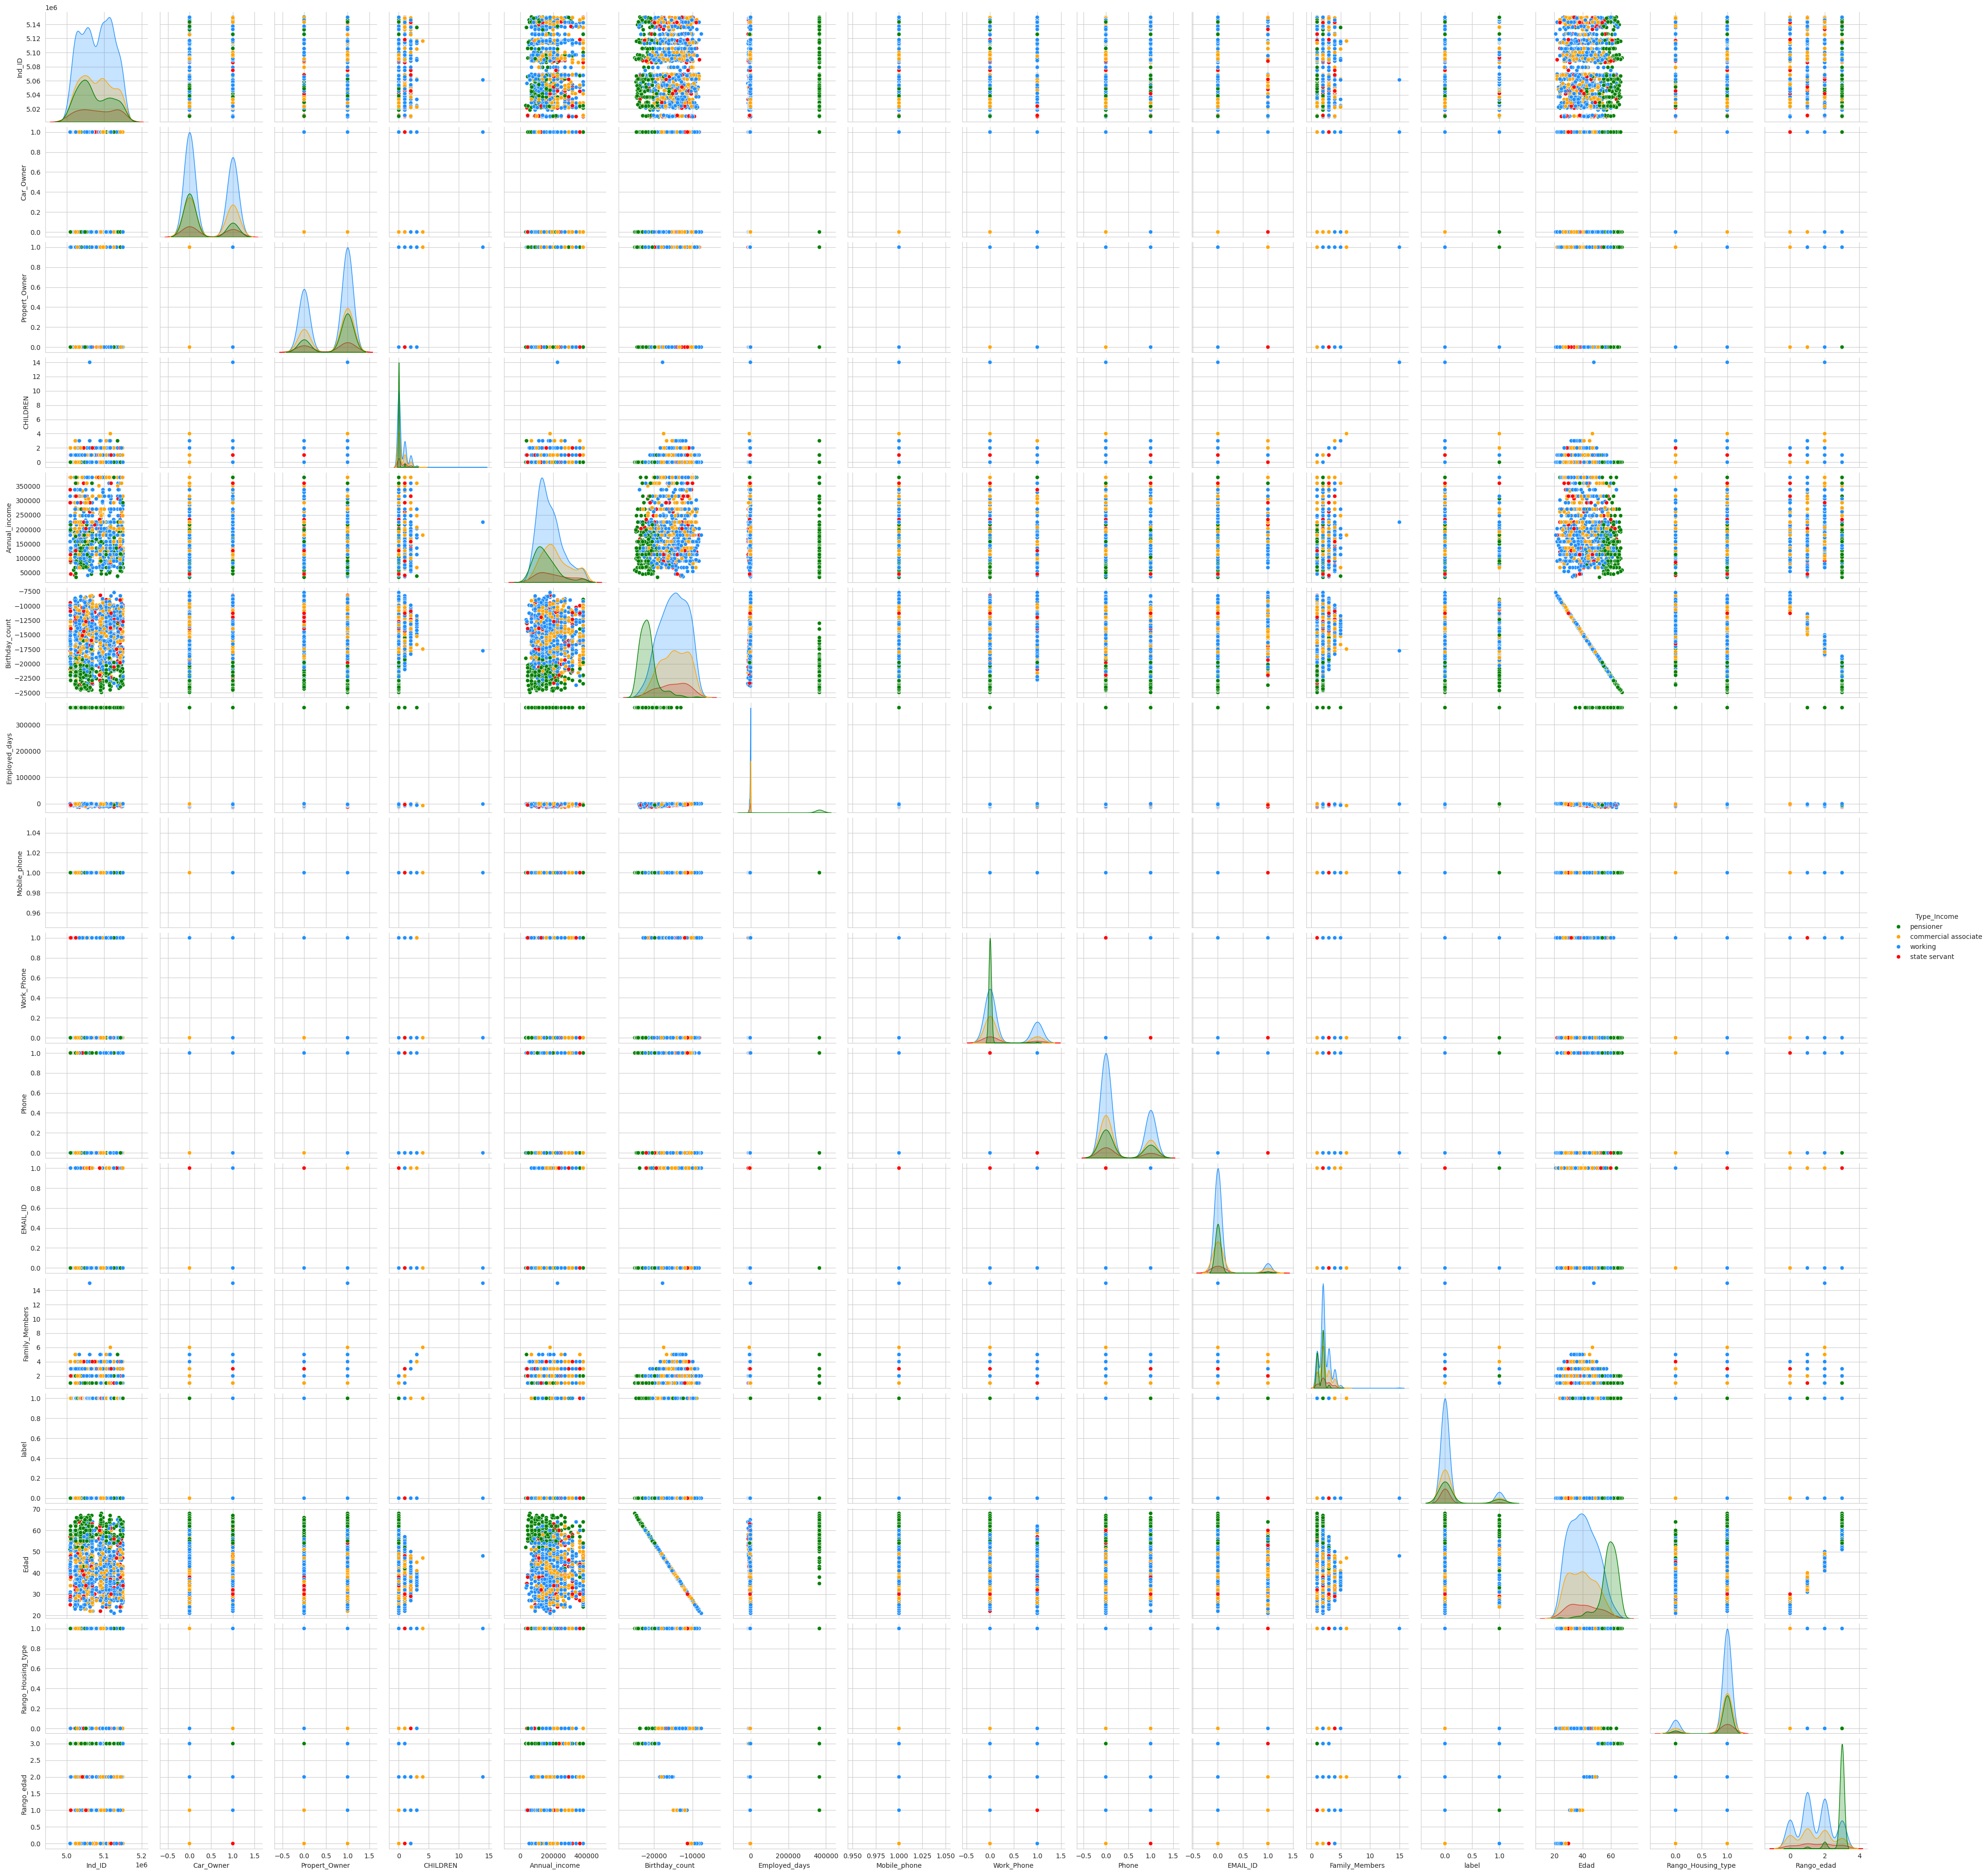

In [919]:
plt.figure(figsize=(7,7))
sns.set_style('whitegrid')
sns.pairplot(data=dfcredito, hue='Type_Income', palette=['green','orange','dodgerblue', 'red'])

<p style="color: #1e90ff; font-size: 16px;">ENCARGO 15: Analizar la correlación entre variables
 </p>

<Axes: >

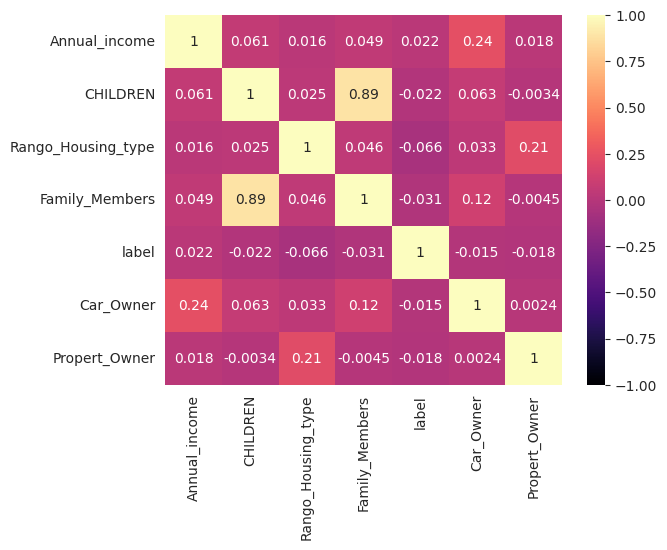

In [920]:
df_map = dfcredito[['Annual_income','CHILDREN','Rango_Housing_type','Family_Members', 'label','Car_Owner', 'Propert_Owner']]
sns.heatmap(df_map.iloc[:,:].corr(), vmin=-1, vmax=1, cmap='magma', annot=True)

##### En el mapa de calor observamos que las columnas CHILDREN y Family_Members están altamente correlacionadas (0.89) por lo que para el análisis posterior podríamos omitir una de estas columnas.

## Reducción de la dimensionalidad -PCA

In [921]:
# Antes de aplicar el análisis de PCA  observamos si algunas columnas por su nombre serían o no prescindibles para los siguientes análisis.
# Mobile phone
# Verificamos cuántos valores diferentes hay en dicho campo.
dataframe_kaggle['Mobile_phone'].unique()

array([1])

In [922]:
#### Hemos observado que la columna "Mobile_phone" solo tiene un tipo de valor que es 1 y quiere decir que todos los clientes del banco tienen teléfono móvil.
#### A simple inspección podemos darnos cuenta que esta columna no aporta alguna información relevante en el análisis si un cliente puede calificar a una tarjeta de crédito o no ya que todos tienen un dispositivo móvil(celular).
#### Además de eliminar esta columna, también eliminamos las otras columnas que no representan importancia relevante en el análisis.
dfcredito.drop(['Mobile_phone', 'EMAIL_ID', 'Work_Phone', 'Phone','Ind_ID','fecha_born','Birthday_count','Employed_days','Edad','Housing_type'], axis=1, inplace=True)

In [923]:
# Nos quedamos con las siguientes columnas del dataframe dfcredito
dfcredito.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   GENDER              1548 non-null   object
 1   Car_Owner           1548 non-null   int64 
 2   Propert_Owner       1548 non-null   int64 
 3   CHILDREN            1548 non-null   int64 
 4   Annual_income       1548 non-null   int64 
 5   Type_Income         1548 non-null   object
 6   EDUCATION           1548 non-null   object
 7   Marital_status      1548 non-null   object
 8   Type_Occupation     1548 non-null   object
 9   Family_Members      1548 non-null   int64 
 10  label               1548 non-null   int64 
 11  Rango_Housing_type  1548 non-null   int64 
 12  Rango_edad          1548 non-null   int64 
dtypes: int64(8), object(5)
memory usage: 157.3+ KB


##### En total, nos quedamos con las siguientes columnas:
##### * Categóricas:GENDER,Type_Income, EDUCATION,Marital_status y Type_Occupation
##### * Numéricas:Car_Owner, Propert_Owner, CHILDREN, Annual_income, Family_Members, label, Rango_edad y Rango_Housing_type       

Por ello, en las siguientes líneas convertiremos todas las demás variables en categóricas

In [924]:
# Para la columna 'Type_Income',definimos los rangos de la columna nueva cambiando a valores numéricos con el método "replace"
dfcredito['Type_Income'] = dfcredito['Type_Income'].replace({'pensioner': 0, 'commercial associate': 1, 'working': 2, 'state servant': 3})

# Para la columna 'EDUCATION',definimos los rangos de la columna nueva cambiando a valores numéricos con el método "replace"
dfcredito['EDUCATION'] = dfcredito['EDUCATION'].replace({'higher education':0, 'secondary / secondary special':1,
       'lower secondary':2, 'incomplete higher':3, 'academic degree':4})
# Para la columna 'Marital_status',definimos los rangos de la columna nueva cambiando a valores numéricos con el método "replace"
dfcredito['Marital_status'] = dfcredito['Marital_status'].replace({'married':0, 'single / not married':1, 'civil marriage':2, 'separated':3,
       'widow':4})
# Para la columna 'GENDER',definimos los rangos de la columna nueva cambiando a valores numéricos con el método "replace"
dfcredito['GENDER'] = dfcredito['GENDER'].replace({'f':0, 'm':1})

dfcredito

GENDER  Car_Owner  Propert_Owner  CHILDREN  Annual_income  Type_Income  \
0          1          1              1         0         180000            0   
1          0          1              0         0         315000            1   
2          0          1              0         0         315000            1   
3          0          1              0         0         191399            1   
4          0          1              0         0         315000            1   
...      ...        ...            ...       ...            ...          ...   
1543       0          0              1         0         191399            1   
1544       0          0              0         0         225000            1   
1545       1          1              1         2         180000            2   
1546       1          1              0         0         270000            2   
1547       0          1              1         0         225000            2   

      EDUCATION  Marital_status Type_Occupation  Family_Members  label  \
0             0               0        laborers               2      1   
1             0               0        laborers               2      1   
2             0               0        laborers               2      1   
3             0               0        laborers               2      1   
4             0               0        laborers               2      1   
...         ...             ...             ...             ...    ...   
1543          0               0        managers               2      0   
1544          3               1     accountants               1      0   
1545          0               0        managers               4      0   
1546          1               2         drivers               2      0   
1547          0               0        laborers               2      0   

      Rango_Housing_type  Rango_edad  
0                      1           3  
1                      1           1  
2                      1           2  
3                      1           1  
4                      1           1  
...                  ...         ...  
1543                   1           1  
1544                   1           0  
1545                   1           1  
1546                   1           2  
1547                   1           2  

[1548 rows x 13 columns]

En el caso de la columna 'Type_Occupation' se puede observar la cantidad de clientes con cierta ocupación para agruparlos en menos categorías.

In [925]:
# Tipos de ocupaciones
dfcredito['Type_Occupation'].unique()

array(['laborers', 'core staff', 'cooking staff', 'sales staff',
       'accountants', 'high skill tech staff', 'managers',
       'cleaning staff', 'drivers', 'low-skill laborers', 'it staff',
       'waiters/barmen staff', 'security staff', 'medicine staff',
       'private service staff', 'hr staff', 'secretaries',
       'realty agents'], dtype=object)

In [926]:
# Cantidad de clientes por cada tipo de ocupación
dfcredito['Type_Occupation'].value_counts()

Type_Occupation
laborers                 756
core staff               174
managers                 136
sales staff              122
drivers                   86
high skill tech staff     65
medicine staff            50
accountants               44
security staff            25
cleaning staff            22
cooking staff             21
private service staff     17
secretaries                9
low-skill laborers         9
waiters/barmen staff       5
hr staff                   3
it staff                   2
realty agents              2
Name: count, dtype: int64

In [927]:
# Para la columna 'Type_Occupation',definimos los rangos de la columna nueva cambiando a valores numéricos con el método "replace"
# Supongamos que tu DataFrame se llama dfcredito
dfcredito['Type_Occupation'] = dfcredito['Type_Occupation'].replace({
    'managers': 'Alta Dirección y Profesionales',
    'high skill tech staff': 'Alta Dirección y Profesionales',
    'medicine staff': 'Alta Dirección y Profesionales',
    'accountants': 'Alta Dirección y Profesionales',
    'it staff': 'Alta Dirección y Profesionales',
    'realty agents': 'Alta Dirección y Profesionales',

    'core staff': 'Personal Administrativo y de Soporte',
    'secretaries': 'Personal Administrativo y de Soporte',
    'hr staff': 'Personal Administrativo y de Soporte',

    'sales staff': 'Ventas y Servicio al Cliente',
    'waiters/barmen staff': 'Ventas y Servicio al Cliente',
    'private service staff': 'Ventas y Servicio al Cliente',

    'drivers': 'Trabajadores Técnicos y Manuales Calificados',
    'security staff': 'Trabajadores Técnicos y Manuales Calificados',
    'cleaning staff': 'Trabajadores Técnicos y Manuales Calificados',
    'cooking staff': 'Trabajadores Técnicos y Manuales Calificados',
    'low-skill laborers': 'Trabajadores Técnicos y Manuales Calificados',
    'laborers': 'Trabajadores Técnicos y Manuales Calificados',

    # Si hay otras ocupaciones no especificadas, las agrupamos en 'Otros'
    'other_occupation1': 'Otros',
    'other_occupation2': 'Otros'
})


In [928]:
# La nueva cantidad de clientes por cada tipo de ocupación
dfcredito['Type_Occupation'].value_counts()

Type_Occupation
Trabajadores Técnicos y Manuales Calificados    919
Alta Dirección y Profesionales                  299
Personal Administrativo y de Soporte            186
Ventas y Servicio al Cliente                    144
Name: count, dtype: int64

Ahora convertimos a números esas categorías

In [929]:
dfcredito['Type_Occupation'] = dfcredito['Type_Occupation'].replace({
    'Alta Dirección y Profesionales': 0,
    'Personal Administrativo y de Soporte': 1,
    'Ventas y Servicio al Cliente': 2,
    'Trabajadores Técnicos y Manuales Calificados': 3,
    'Otros': 4
})

<p style="color: #1e90ff; font-size: 16px;">ENCARGO 9:  Identificar la variable target y verificar el balance entre clases </p>

##### En este primer paso vamos a identificar la variable target

In [930]:
dfcredito['label'].value_counts()

label
0    1373
1     175
Name: count, dtype: int64

###### Por ejemplo, de la colummna label (target o columna objetivo) se tiene un desbalance entre la cantidad de valores '0' y '1' como se observa en la siguiente celda.

In [931]:
dfcredito.groupby('label').size()

label
0    1373
1     175
dtype: int64

###### Se observa que el target se encuentra desbalanceado ya que tiene 1373 valores 0 y solo 175 valores 1.

##### En este segundo paso de este encargo vamos a balancear el target; para ello separamos en dos dataframes la variable de interés 'label' de manera que al reorganizarlos y concatenarlos obtengamos una distribución con igual valores "0" y "1" en el total de sus valores. Una vez tengo los dos dataframes aplicamos SMOTE. Este generará muestras sintéticas a fin de balancear el target "label".

In [932]:
x = dfcredito.drop(['label'], axis=1)
y = dfcredito[['label']]
smote =SMOTE()
x_smote, y_smote = smote.fit_resample(x, y)
print(y.value_counts())
print(y_smote.value_counts())

label
0        1373
1         175
Name: count, dtype: int64
label
0        1373
1        1373
Name: count, dtype: int64


Ahora, concatenamos todo hasta tener el mismo dataframe pero ya con la variable "label" balanceada.

In [933]:
dfcredito = pd.concat([x_smote, y_smote], axis=1)
dfcredito.head()

GENDER  Car_Owner  Propert_Owner  CHILDREN  Annual_income  Type_Income  \
0       1          1              1         0         180000            0   
1       0          1              0         0         315000            1   
2       0          1              0         0         315000            1   
3       0          1              0         0         191399            1   
4       0          1              0         0         315000            1   

   EDUCATION  Marital_status  Type_Occupation  Family_Members  \
0          0               0                3               2   
1          0               0                3               2   
2          0               0                3               2   
3          0               0                3               2   
4          0               0                3               2   

   Rango_Housing_type  Rango_edad  label  
0                   1           3      1  
1                   1           1      1  
2                   1           2      1  
3                   1           1      1  
4                   1           1      1

In [934]:
# Verificamos el target balanceado en el dataframe
dfcredito['label'].value_counts()

label
1    1373
0    1373
Name: count, dtype: int64

##### Se observa que se tiene un balance en la variable target('label') por lo que concluímos este paso

Creación del conjunto de validación


In [935]:
df_train, df_test = train_test_split(dfcredito, test_size=0.2, stratify=dfcredito['label'])

##### Escalado de variables

In [936]:
std = StandardScaler()
std_train = std.fit_transform(df_train)

std_test = std.transform(df_test)


### Componentes principales

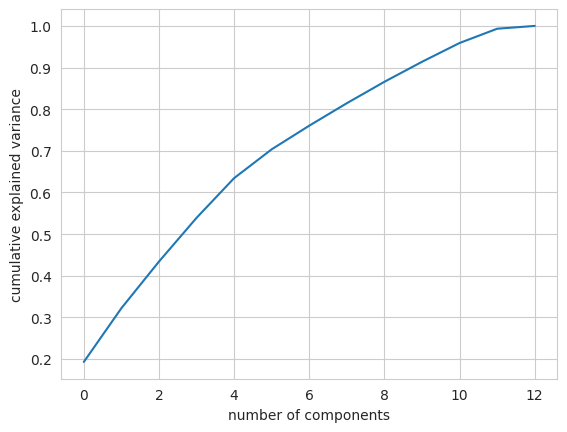

In [937]:
pca = PCA().fit(std_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

##### Observamos que entre 8 y 10 están el número de componentes principales por lo que podemos verlo de manera sencilla mediante una suma acumulada. Pero ya que el NCP es un número entero, tomamos el único valor entre 8 y 10 que es 9.

#### Número de componentes elejidos

In [938]:
pca_ver2 = PCA(n_components = 9)
pca_valor = pca_ver2.fit_transform(df_train)

In [939]:
pca_ver2.components_.T

array([[ 1.23388380e-06,  3.55823826e-02,  9.91446691e-02,
         9.74910862e-02, -3.81560449e-02, -1.29768435e-01,
        -6.19823994e-02,  9.81772281e-04,  5.76565128e-01],
       [ 1.34517077e-06,  6.43286840e-02,  5.95452012e-02,
         3.88975102e-02,  3.46457934e-04, -7.78985084e-02,
        -1.40972301e-01, -1.89605830e-01,  6.95048294e-01],
       [ 5.42560729e-08, -2.81650626e-02, -2.93342372e-02,
        -6.15311106e-02,  1.08531066e-01, -7.37654756e-02,
        -1.02192548e-01, -7.31593658e-01, -3.03761139e-01],
       [ 7.13432697e-07,  2.58345939e-01,  2.23715358e-01,
         3.48438299e-02,  5.05488038e-01,  1.89555048e-01,
        -4.57163015e-02,  1.28100419e-01, -6.66595194e-02],
       [ 1.00000000e+00, -3.47305648e-06,  1.29769351e-06,
         1.23264436e-07,  4.71827392e-07, -4.96011369e-07,
         1.28414080e-06,  4.40125479e-07, -1.53397553e-06],
       [ 7.94152301e-07,  3.65802487e-01, -5.03610801e-02,
         3.79678964e-01, -1.25075277e-02, -7.405934

##### Es decir se tiene 1238 filas con tan solo 9 variables para ser trabajadas en el análisis de predicción.

Para ello realizamos el mapa de calor con las variables para considerar los 9 componentes del PCA.

<Axes: >

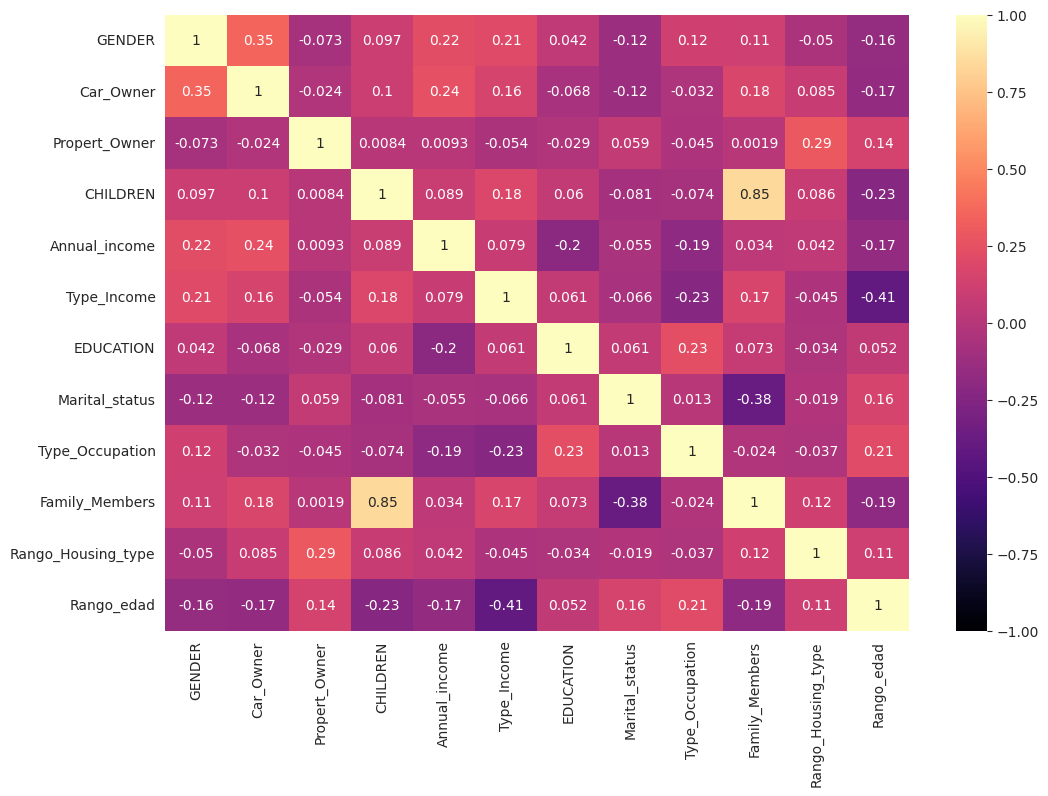

In [940]:
df_train = pd.DataFrame(df_train, columns=['GENDER' , 'Car_Owner',  'Propert_Owner',  'CHILDREN',  'Annual_income', 'Type_Income',  'EDUCATION',  'Marital_status', 'Type_Occupation' , 'Family_Members',  'Rango_Housing_type' , 'Rango_edad', 'label'])
df_map = pd.DataFrame(df_train.drop(['label'], axis=1))  # Drop the 'label' column

plt.figure(figsize=(12, 8))
sns.heatmap(df_map.iloc[:,:].corr(), vmin=-1, vmax=1, cmap='magma', annot=True)

###### De acuerdo a este segundo mapa de calor de variables netamente numéricas que han quedado vemos que continúa la correlación baja entre las demás variables  y solo 'Family_Members' y 'CHILDREN' (3 y 9 respectivamente) tienen alta correlación. Ya que el número de componentes segúnel PCA es 9 y aquí tenemos 12 variables podemos quedarnos con 9 variables eliminando así 'Family_Members' y las dos últimas columnas (11 y 12).

In [941]:
# Ahora, definimos las variables tanto para el df_train como para df_test
X_train = df_train[['GENDER','Car_Owner','Propert_Owner','CHILDREN', 'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status','Type_Occupation']]
y_train = df_train['label']

X_test = df_test[['GENDER','Car_Owner','Propert_Owner','CHILDREN', 'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status','Type_Occupation']]
y_test = df_test['label']

In [942]:
# Escalamos las características X_train y X_test
scaler = StandardScaler()
# Ajustamos el escalador a los datos de entrenamiento y transformamos
X_train = scaler.fit_transform(X_train)

# Transformamos los datos de prueba
X_test = scaler.transform(X_test)

In [943]:
df_train['label'].value_counts()

label
1    1098
0    1098
Name: count, dtype: int64

In [944]:
X_train

array([[-0.68260868, -0.69482509, -1.13468057, ..., -1.16988688,
         1.41729456, -0.88574291],
       [ 1.46496819,  1.43921113, -1.13468057, ...,  0.43678703,
        -0.52369631,  0.78673467],
       [-0.68260868, -0.69482509, -1.13468057, ...,  0.43678703,
        -0.52369631,  0.78673467],
       ...,
       [-0.68260868, -0.69482509, -1.13468057, ...,  0.43678703,
        -0.52369631, -1.7219817 ],
       [-0.68260868,  1.43921113,  0.8813053 , ...,  0.43678703,
        -0.52369631,  0.78673467],
       [-0.68260868, -0.69482509,  0.8813053 , ..., -1.16988688,
        -0.52369631, -0.04950412]])

In [945]:
X_test

array([[-0.68260868, -0.69482509,  0.8813053 , ...,  0.43678703,
         0.44679913,  0.78673467],
       [-0.68260868, -0.69482509,  0.8813053 , ...,  0.43678703,
         0.44679913,  0.78673467],
       [ 1.46496819, -0.69482509, -1.13468057, ..., -1.16988688,
        -0.52369631,  0.78673467],
       ...,
       [-0.68260868, -0.69482509,  0.8813053 , ...,  0.43678703,
         3.35828542,  0.78673467],
       [ 1.46496819, -0.69482509,  0.8813053 , ...,  0.43678703,
        -0.52369631,  0.78673467],
       [-0.68260868, -0.69482509,  0.8813053 , ..., -1.16988688,
        -0.52369631, -0.88574291]])

Se tiene el X_train, X_test escalados y transformados y con la variable target balanceada.

Hacemos una prueba con un algoritmo de Regresión logística para verificar que los datos de entrenamiento y de test están disponibles para otros algoritmos de tipo supervisado.

In [946]:
lr = LogisticRegression(random_state=101, max_iter=1000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=101)

In [947]:
preds_train = lr.predict(X_train)
print(confusion_matrix(y_train, preds_train))
print(classification_report(y_train, preds_train))

[[745 353]
 [316 782]]
              precision    recall  f1-score   support

           0       0.70      0.68      0.69      1098
           1       0.69      0.71      0.70      1098

    accuracy                           0.70      2196
   macro avg       0.70      0.70      0.70      2196
weighted avg       0.70      0.70      0.70      2196



##### Observamos que el accuracy es casi el 70% por lo que no podríamos considerar este modelo para realizar las predicciones.



## ANÁLISIS FINAL:
###### Para la siguiente parte de la actividad, nos quedaremos con las siguientes variables
X_train = df_train_num[['GENDER','Car_Owner','Propert_Owner','CHILDREN', 'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status','Type_Occupation']
y_train = df_train['label'].
Esto ya que de acuerdo a la reducción de variables éstas son las que representan casi el 90% de los datos totales del dataframe. Además se realizó una segunda correlación con solo variables numpericas para verificar si se podría tomar en cuenta el análisis PCA (9) pero se evidenció escasa correlación entre las variables y solo dos varibles tenían alta correlación. Es por ello que se decidió solo eliminar una de las variables altamente relacionadas y quedarnos con las demás variables de baja correlación. Es decir, se tiene 9 variables numéricas incluyendo el target ('label') balanceado para los siguientes análisis de predicción.

# Minería de datos- ACTIVIDAD 2

Teniendo en cuenta que elejí una data de tipo binaria, es decir, con respuesta sí o no. Entonces usaremos algunos modelos de Aprendizaje Supervisado hallados en la plataforma de Scikit laern.
Fuente: https://scikit-learn.org/stable/modules/kernel_ridge.html

Para empezar con los análisis de los modelos, vamos a llamar a X_train y y_train para verificar que tenemos la data adecuada y preprocesada

## 1. Importación de librerías para uso de algoritmos de aprendizaje supervisado

In [948]:
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.kernel_ridge import KernelRidge

In [949]:
!pip install graphviz
from sklearn.tree import export_graphviz

In [950]:
import graphviz

In [951]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

## 2. Evaluación de distintos modelos de tipo supervisado

## 2.1 Evaluación de modelos posibles

Realizamos una función con los algoritmos supervisados para clasificación. Éstas son  'Histogram-Based Gradient Boosting (HGBT)', 'Logistic Regression','Decision Tree Classifier','Random Forest Classifier','K Neighbors Classifier','Gaussian NB','SVC','Ada Boost Classifier', 'Gradient Boosting Classifier','Extra Trees Classifier' y 'ExtraTreesClassifier'.


In [952]:
def classification_models(X, y):
    np.random.seed(42)
    scoring = ['accuracy', 'precision', 'recall', 'f1']
    model_names = []
    accuracy = []
    precision = []
    recall = []
    f1 = []

    classifiers = [('HistGradientBoostingClassifier', HistGradientBoostingClassifier()),
            ('LogisticRegression', LogisticRegression()),
        ('DecisionTreeClassifier', DecisionTreeClassifier()),
        ('RandomForestClassifier', RandomForestClassifier()),
        ('KNeighborsClassifier', KNeighborsClassifier()),
        ('GaussianNB', GaussianNB()),
        ('SVC', SVC()),
        ('AdaBoostClassifier', AdaBoostClassifier()),
        ('GradientBoostingClassifier', GradientBoostingClassifier()),
        ('ExtraTreesClassifier', ExtraTreesClassifier()),
    ]

    for model in classifiers:
        model_names.append(model[0])
        cv_results = cross_validate(model[1], X, y, scoring=scoring, cv=5)
        print("Accuracy:", cv_results['test_accuracy'].mean())
        print("Precision:", cv_results['test_precision'].mean())
        print("Recall:", cv_results['test_recall'].mean())
        print("F1-Score:", cv_results['test_f1'].mean())


        accuracy.append(cv_results['test_accuracy'].mean())
        precision.append(cv_results['test_precision'].mean())
        recall.append(cv_results['test_recall'].mean())
        f1.append(cv_results['test_f1'].mean())

    data = pd.DataFrame({
        'Model name':model_names,
        'Accuracy':accuracy,
        'Precision':precision,
        'Recall':recall,
        'F1 Score':f1
    })

    return data

scores = classification_models(X_train, y_train)

Accuracy: 0.8652246841996272
Precision: 0.8367172623682168
Recall: 0.9080240763802407
F1-Score: 0.8707805828102643
Accuracy: 0.6867177469455374
Precision: 0.6793850435754336
Recall: 0.7067164798671648
F1-Score: 0.692612785289084
Accuracy: 0.8547483951128599
Precision: 0.8301607565201357
Recall: 0.8925072644250726
F1-Score: 0.8600110340332918
Accuracy: 0.8652153655001035
Precision: 0.8441871936923784
Recall: 0.8961643835616439
F1-Score: 0.8693028080873508
Accuracy: 0.7800673017187824
Precision: 0.7403466599785588
Recall: 0.8651764217517643
F1-Score: 0.797519021490946
Accuracy: 0.6580161524125077
Precision: 0.6302050231804038
Recall: 0.7659153175591531
F1-Score: 0.6913213328585128
Accuracy: 0.7796096500310623
Precision: 0.748490406804504
Recall: 0.8433374844333749
F1-Score: 0.7927777104532922
Accuracy: 0.7313418927314144
Precision: 0.7089363913473352
Recall: 0.7841469489414694
F1-Score: 0.7444838105669678
Accuracy: 0.7900745495961897
Precision: 0.7555530118590809
Recall: 0.85880863428808

A2 ENCARGO 6: Proponer múltiples métodos de evaluación del desempeño del modelo (e.g., precisión, recall, F1-score, etc.).

Se emplea los siguiente 4 parámetros de desempeño para cada modelo.

**Accuracy**

También llamado exactitud.La proporción de predicciones correctas entre el total de predicciones.Es usual su uso cuando las clases están equilibradas y cuando los costos de falsos positivos y falsos negativos son similares.

**Precisión**

Mide la proporción de verdaderos positivos entre todos los positivos predichos .
Usualmente se prioriza cuando el costo de los falsos positivos es alto.

**Recall**

Mide la proporción de verdaderos positivos entre todos los casos positivos reales y se prioriza este parámetro cuando el costo de los falsos negativos es alto.

**F1-score**

Mide la media armónica de la precisión y el recall y se usa cuando hay un equilibrio entre la precisión y el recall o cuando las clases están desequilibradas. Es decir,cuando en el caso los falsos positivos y los falsos negativos son importantes.

In [953]:
scores

Model name  Accuracy  Precision    Recall  F1 Score
0  HistGradientBoostingClassifier  0.865225   0.836717  0.908024  0.870781
1              LogisticRegression  0.686718   0.679385  0.706716  0.692613
2          DecisionTreeClassifier  0.854748   0.830161  0.892507  0.860011
3          RandomForestClassifier  0.865215   0.844187  0.896164  0.869303
4            KNeighborsClassifier  0.780067   0.740347  0.865176  0.797519
5                      GaussianNB  0.658016   0.630205  0.765915  0.691321
6                             SVC  0.779610   0.748490  0.843337  0.792778
7              AdaBoostClassifier  0.731342   0.708936  0.784147  0.744484
8      GradientBoostingClassifier  0.790075   0.755553  0.858809  0.803573
9            ExtraTreesClassifier  0.857477   0.842386  0.879768  0.860627

## 2.2 Modelo HGBT

Modelo  Histogram-Based Gradient Boosting (HGBT): tomé este algoritmo a evaluar ya que de acuerdo a Scikit-learn resulta ser una alternativa competitiva a Random forest por tres ventajas destacables:

* Los árboles son construídos profundamente para realizar un sobreajuste individual.

* Los árboles son construídos de manera secuencial de tal manera que un árbol n se contruye en base a la mejora de los errores del árbol n-1. A difeencia del Random Forest que se guían de la mayoría de los árboles para seguir construyendo árboles que pueden ser excesivos en proporción.

* Uso del algoritmo binning eficiente que se encarga de procesar los datos y sus características para acelerar la creación del siguiente árbol.

A pesar de que el modelo HGBT es competitiva para Random Forest, resultó con menor Recall y F1 con respecto al modelo Random Forest. Sin embargo, obtuvo un accuracy mayor pero solo por 0.005 con respecto al Random Forest. Esto puede ser causado por la particularidad de las variables y sus varianzas que al ser predecido con HGBT conllevaría a un sobreajuste lo que desencadenó un rendimiento deficiente con los datos de evaluación (df_test). Aún así en caso de detección de enfermedades sería óptimo contar con un alto valor de Recall (0.9) donde es un gran costo los falsos negativos ya que si a una personba le dicen que no tiene diabetes este podría avanzar y empeorar su salud.


## 2.3 Modelo de árboles

De los resultados de cada modelo, podemos explayarnos y destacar el HGBT, Random Forest Classifier y Extra Trees Classifier cuyos parámetros son más cercanos a 1 del total de algoritmos usados. De los tres mencionados se observa que por poco pero significativo valor, el modelo Random Forest Classifier tiene los más altos parámetros en cuanto a precisión y exactitud y el modelo HGBT tiene alto Recall Y F1.

## 3. Modelo escogido: Randon Forest Classifier

## 3.1 Explicación y funcionamiento del modelo

A2 ENCARGO 3:  Detallar el algoritmo de Minería de Datos y el resultado esperado de manera superficial.

Con Random Forest Classifier se espera disminuir la varianza del estimador del bosque ya que cuando se realiza un solo árbol de decisión pasa que se observan varianzas altas lo que lleva al sobreajuste del modelo. Por ello, el bosque toma aleatoriamente el promedio de las varianzas lo que hace que se cancele dichos valores y solo haya un valor.Por lo tanto, con este modelo se espera disminuir la varianza de manera significativa mostrándose así valores del  *score* de la predicción más cercanos a 1 con respecto a otros. Además se tendría con mayor exactitud las predicciones correctas de que se otorgue la tarjeta de crédito o no al cliente.


A2 ENCARGO 1: Indicar claramente el algoritmo de Minería de Datos elegido  y

A2 ENCARGO 5: Demostrar un conocimiento profundo del algoritmo elegido y justificar por qué es el más adecuado.


El algoritmo elegido es Random Forest Classifier, este modelo fue elegido por un accuracy(exactitud) alto y  mayor precisión (0.8441) con respecto a los demás algoritmos evaluados.En este caso de aplicación a una tarjeta de crédito, no es tan importante los falsos positivos pero sí los falsos negativos por lo que sí se requiere alta exactitud y precisión que sí lo tenemos con el modelo de Random Forest. Es decir, a pesar de que Random Forest contaba con un ligero valor menor de Recall y F1 que el modelo HGBT; debido a las circunstancias del caso se decide optar por priorizar el accuracy y la precisión.

Dar la tarjeta de crédito  a una persona que no podría pagar  a fin de mes podría ser problemático y acarrear trámites de sanciones y crear una relación tóxica entre el cliente y el banco; incluso podría desprestigiar la imagen del banco. En cambio, no dar una tarjet de crédito a una persona  que sí aplicaría no es tan costoso ya que la persona puede volver a aplicar a dicho crédito y el cliente siempre está en búsqueda de lograr ello. Suponiendo que este es un banco exitoso y que otorga bajas tasas de interés.

Por todo ello es mejor asegurar la precisión que el valor del Recall,es decir, asegurar la otorgación de la línea de crédito quienes sí estén verdaderamente calificados.


**MODELO RANDOM FOREST CLASSIFIER**

 Este modelo de clasificación brinda una predicción de clase (sí o no) para una data de entrada. Toma en cuenta la mayoría de los votos de los árboles individuales para predecir dicha clase. Se basa en la creación de árboles individuales aleatorios con el promedio de otros árboles para reducir el sobreajuste o variabilidad.

 Así como en los resultados de **score**, este modelo se caracteriza justamente por contar con alta precisión por la reducción de ruido en las predicciones. También maneja eficientemente los datos perdidos ya que cada árbol se construye con una muestra diferente a los datos iniciales.  A pesar que su interpretación mediante la visualización suele ser engorroso, aún así se puede visualizar en árboles individuales.


**El proceso de la creación de árboles aleatorios se da con los siguientes pasos:**

a) Del conjunto de entrenamiento se genera varios subconjuntos mediante muestreo con reemplazo llamándose así un subconjunto como muestra bootstrap.

b) Se construyen los árboles de decisión: para cada bootstrap le corresponde tener un árbol de decisión en la cual en cada nodo se ubica un subconjunto de características hasta completar los demás nodos con el total de características.

c) Cuando se termine de construir todos los árboles, estos se combinan generando así un bosque.

d) La predicción: para esto se hace ingresar a cada árbol una entrada por lo que cada árbol realiza una predicción de manera independiente. Luego para que emitan un resultado de predicción en conjunto (bosque) se hace una votación mayoritaria entre todos los árboles.


A2 ENCARGO 2: Describir las adaptaciones necesarias en los datos para construir el modelo.

El modelo Random Forest trabaja tanto con variables categóricas como numéricas y depende de la librerías usada. En este caso se está usando scikit-learn por lo que fue importante convertir cada variable categórica a variable numérica. Esto se realizó con replace y reemplazando con números empezando de 0.

Como muchos modelos, este implicó realizar una estandarización de cada variable y el balanceo del target "label".

## 3.3 Visualización del modelo e interpretación

A2 ENCARGO 8: Proveer visualizaciones claras y significativas de los resultados del modelo.

In [954]:
# Volvemos a inicializar el modelo
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [955]:
# Elejimos un árbol cualquiera del bosque
tree = clf.estimators_[5]

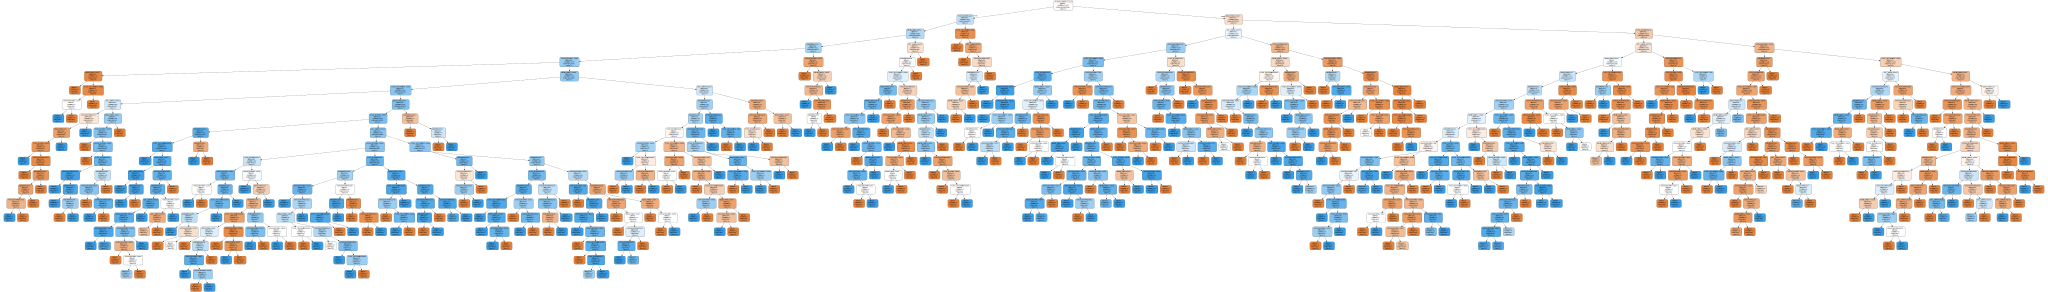

In [956]:
# Convertimos el X_train en un dataframe temporal para que nos permita realizar la gráfica "X_train_df"
if not isinstance(X_train, pd.DataFrame):
    # Si X_train no es un DataFrame, convertirlo en uno
    column_names = ["Feature_" + str(i) for i in range(X_train.shape[1])]  # Crear nombres de columnas si no están disponibles
    X_train_df = pd.DataFrame(X_train, columns=['GENDER','Car_Owner','Propert_Owner','CHILDREN', 'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status','Type_Occupation'],)
else:
    X_train_df = X_train
# Gráfica del árbol completo usando export_graphviz y graphviz

dot_data = export_graphviz(tree, out_file = None,
                           feature_names = ['GENDER','Car_Owner','Propert_Owner','CHILDREN', 'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status','Type_Occupation'],
                           class_names = ['0', '1'],  # Donde 0 significa tarjeta de crédito aprovada y 1, tarjeta de crédito denegada
                           filled = True, rounded = True,
                           special_characters = True)
graph = graphviz.Source(dot_data)
graph

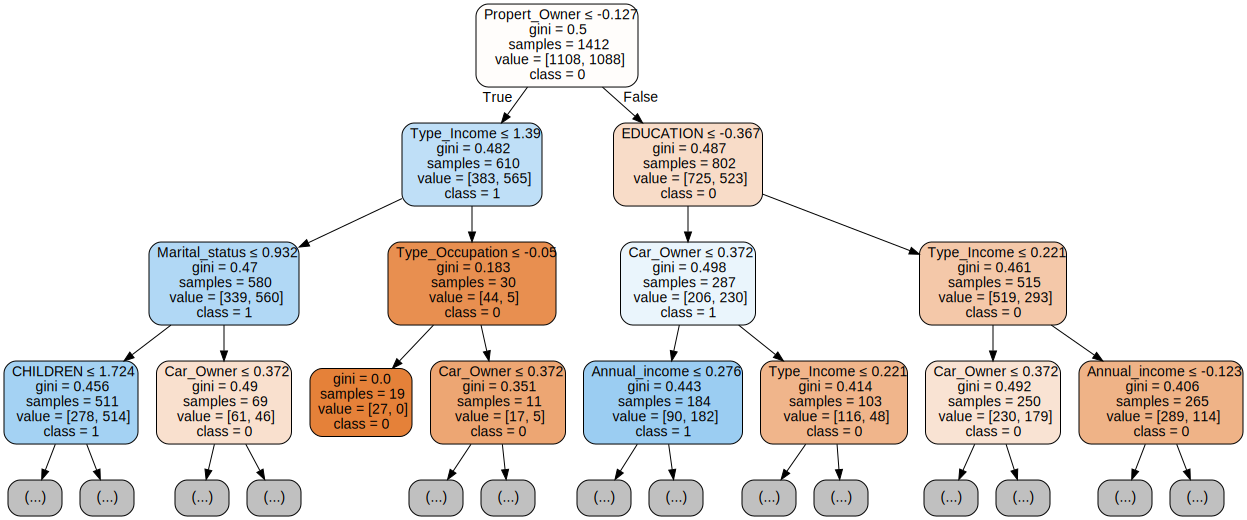

In [957]:
# Gráfica de un solo árbol con menor profundidad usando export_graphviz y graphviz

dot_data = export_graphviz(tree, out_file=None,
                           feature_names= ['GENDER','Car_Owner','Propert_Owner','CHILDREN', 'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status','Type_Occupation'],
                           class_names=['0', '1'],  # Donde 0 significa tarjeta de crédito aprovada y 1, tarjeta de crédito denegada
                           filled=True, rounded=True,
                           special_characters=True,
                           max_depth=3)

graph = graphviz.Source(dot_data)
graph.render("random_forest_tree")
graph

A2 ENCARGO 9: Detallar el algoritmo de Minería de Datos con profundidad, mostrando comprensión de los datos y cómo tratarlos.

Para realizar una explicación del árbol individual # 5 se hará un muestreo en la siguiente línea. Este árbol fue graficado con menor profundidad para mejorar su visualización.

In [958]:
# Uso del método 'sample' para obtener 3 filas al azar
a = X_train_df.sample(n=3)
a

GENDER  Car_Owner  Propert_Owner  CHILDREN  Annual_income  \
1116  1.464968  -0.694825       0.881305  0.990998      -0.867258   
600  -0.682609  -0.694825      -1.134681  0.990998      -0.867258   
807  -0.682609  -0.694825      -1.134681 -0.475465       0.196162   

      Type_Income  EDUCATION  Marital_status  Type_Occupation  
1116     0.805387   0.436787       -0.523696         0.786735  
600      0.805387   0.436787        1.417295        -0.885743  
807     -0.364342   0.436787        1.417295         0.786735

Analizando los datos, la fila 547:

En la primera hoja se observa Propert_Owner ≤ -0.131 y sa fila 547 cumple con esta condición por lo que nos desplazamos al lado izquierdo del árbol y vemos otro nodo que indica Type_Income ≤ 0.237 lo cual también sigue siendo verdadero para la fila en cuestión; entonces vamos a lado izquierdo. En el siguiente nodo vemos Marital_status ≤ 2.836 lo cual también es verdadero por lo que seguimos al lado izquierdo. Identificamos que los nodos anteriores nos llevan  a más profundidad por lo que se podría seguir realizando la verificación pero en este caso, nos quedmos en el nodo Car_Owner ≤ 0.354 cuya condición cumple con el valor de la fila 547.





Importancia de las características en el modelo

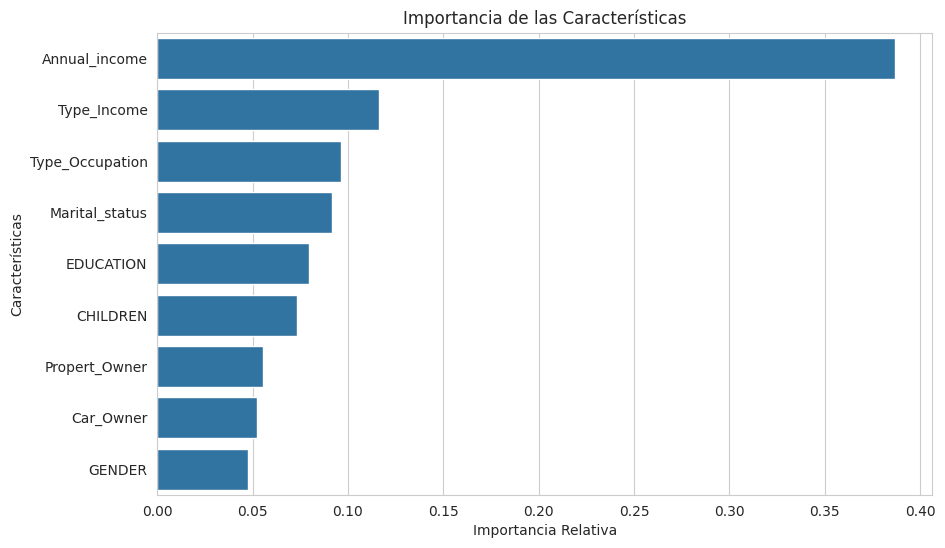

In [959]:
# Definimos las importancias y sus índices
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

# Gráfico de barras de la importancia de las características
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=X_train_df.columns[indices])
plt.title('Importancia de las Características')
plt.xlabel('Importancia Relativa')
plt.ylabel('Características')
plt.show()

Se observa que el ingreso anual es la característica de mayor importancia ya que determina en mayor medida el resultado de la predicción en este modelo.

# 4. Análisis final

## 4.1 Análisis de la presente predicción del caso de aplicación a una tarjeta de crédito

A2 ENCARGO 4:  Explicar cómo se podrían utilizar esos patrones para tomar decisiones.


Con los patrones obtenidos podemos decidir si darle o no la tarjeta de crédito a un cliente con determinadas características. Es decir estas características usadas en la predicción son factores trascendentales para evaluar a un cliente. Por ejemplo el ingreso anual, propietario(a) de carros o bienes inmuebles y así tener un enfoque más determinado a la hora de dar o no un crédito al cliente. Además, el feature importances nos da un panorama más claro de qué característica tomás más en cuenta para evaluar a un cliente lo cual está compilado en la predicción hecha con el actual modelo.

A2 ENCARGO 7: Incluir análisis detallados y reflexiones sobre cada etapa del proceso KDD.

Para realizar un proceso de KDD senecesita tener en claro el tipo de solución al caso que se requiere predecir y las etapas a realizar de acuerdo a las particularidades de la data.

 a) Obtención del conjunto de datos: se obtuvo a partir de dos archivos csv donde uno contenía la data y el otro, el target "label". Percatarse que ambos archivos tengan la misma cantidad de datos y solo así concatenarlas en un solo dataframe. En este punto es importante conocer a detalle cada variable (tipo, dimensión, valores únicos,etc).

 b) Limpieza: en este paso tratamos los valores nulos, duplicados o valores inconsistentes (outliers). En este punto se destaca realizar un adecuado balanceo del target, en este caso se usó SMOTE por ser más práctico y brinda un balanceo óptimo.

 c) Reducción de la dimensionalidad: en los dataframes hay columnas que no aportan valor alguno a todo el conjunto de datos como por ejemplo el # de celular de una persona o si una persona cuenta con celular del trabajo. Así podrían haber columnas insignificantes a nivel de análisis a las cuales corresponde su eliminación para evitar el ruido en el análisis.
  Además, se consideró conveniente realizar un análisis de PCA para la cual se requiere un preprocesamiento de los datos.
  Luego del PCA se optó por realizar un mapa de calor que correlacione las variables entre ellas,de dos variables con alta correlación se puede prescindir de una de ellas ya que este ocasionaría un sobreajuste.

  d) Preprocesamiento: se convirtió a numéricos cada columna del dataframe y luego se separó el conjunto de datos en df_train y df_test.
  Un punto importante a destacar es que se debe estandarizar y transformar los datos ya que para usar la mayoría de modelos predictivos es necesario esto.

  e) Minería de datos: para escoger un modelo adecuado al caso se debe verificar los scores de desempeño de varios modelos posibles y; de acuerdo al caso sea en el campo de salud, ventas, banco, educación u otro; escoger los scores más cercanos a 0. Esto ya que cada campo de aplicación tiene sus prioridades que no necesariamente son iguales para cada parámetro a evaluar. En el presente caso fue más importante la precisión y accuracy en lugar del Recall y F1-score.

Una recomendación final sería la de verificar que los componentes del dataframe (df_train, df_test, X_train, X_test ) después de los siguientes pasos ya que si alguno de ellos sufre alguna modificación no deseada; este podría repercutir en gran medida en los parámetros de desempeño de los modelos predictivos. Esto lo menciono por la experiencia obtenid en este caso aplicado.

## 4.2 Mejoras de la predicción

A2 ENCARGO 10: Proponer técnicas innovadoras o variables adicionales basadas en la investigación.

Una de las técnicas actuales usadas en Random Forest son la curva de ROC y AUC las cuales evalúan el desempeño de esta


### Visualización del desempeño con ROC (Receiver Operating Characteristic)

La Curva ROC es una gráfica que muestra la relación entre la Tasa de Verdaderos Positivos (TPR) y la Tasa de Falsos Positivos (FPR) a varios umbrales de decisión. Es útil para entender el rendimiento del clasificador en términos de sensibilidad y especificidad.

FUENTE: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

AUC (Area Under the Curve):

El AUC es el área bajo la curva ROC. Un modelo perfecto tiene un AUC de 1, mientras que un modelo que predice aleatoriamente tiene un AUC de 0.5.

FUENTE: https://towardsdatascience.com/roc-analysis-and-the-auc-area-under-the-curve-404803b694b9

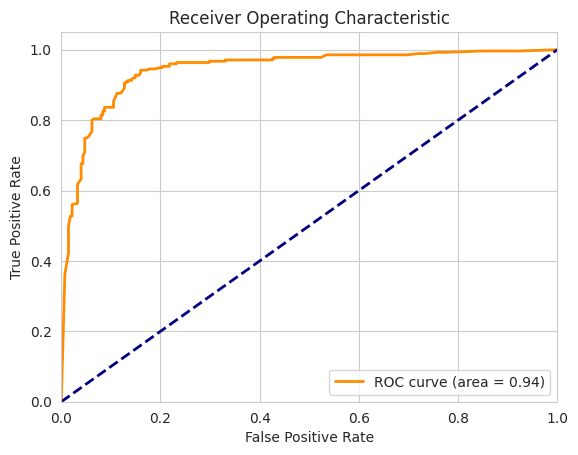

In [960]:
# Repasamos el entrenamiento del modelo de Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Obtención de las probabilidades de predicción para la clase positiva
y_prob = rf.predict_proba(X_test)[:, 1]

# Cálculo de la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)  # auc

# Visualización de la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

INTERPRETACIÓN:

Se observa que a partir de FPR>0.2 en adelante la curva ROC bordea el valor 1 en TPR. Aún asi, la curva ROC se encuentra por encima de la recta diagonal azul lo cual indica que el modelo Random Forest Classifier es un óptimo clasificador. Justamente cuando el FPR es mayor a 0.2 la curva se aleja más de la diagonal lo cual confirma el alto rendimiento del modeo usado.

DONDE:
FPR: tasa de falsos positivos
TPR: tasa de verdaderos positivos

En cuanto al área bajo la curva, el AUC tiene el valor de 0.94. Mientras más cercano a 1 sea sería un modelo perfecto. En este caso el valor de 0.94 indica que el modelo usado es un buen clasificador de mejor rendimiento.


Gracias a estas herramientas usadas comprobamos que el modelo usado (Random Forest Classifier) es óptimo y se ajusta a las características del caso de clasificación binaria para realizar predicciones más exactas y precisas.